### **DATATHON MIBANCON**
--------------------------
##### **INTEGRANTE: Aron Uriarte Zaga**

In [5]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
from google.colab import files

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
balances = "/content/drive/MyDrive/DATATHON MI BANCO/balances.csv"
customers = "/content/drive/MyDrive/DATATHON MI BANCO/customers.csv"
test = "/content/drive/MyDrive/DATATHON MI BANCO/test.csv"
train = "/content/drive/MyDrive/DATATHON MI BANCO/train.csv"

In [9]:
dfb = pd.read_csv(balances)
dfc = pd.read_csv(customers)
df_test = pd.read_csv(test)
df_train = pd.read_csv(train)


In [10]:
# Concatenar los dataframes de df_test y df_train
df_testrain = pd.concat([df_test, df_train], axis=0)

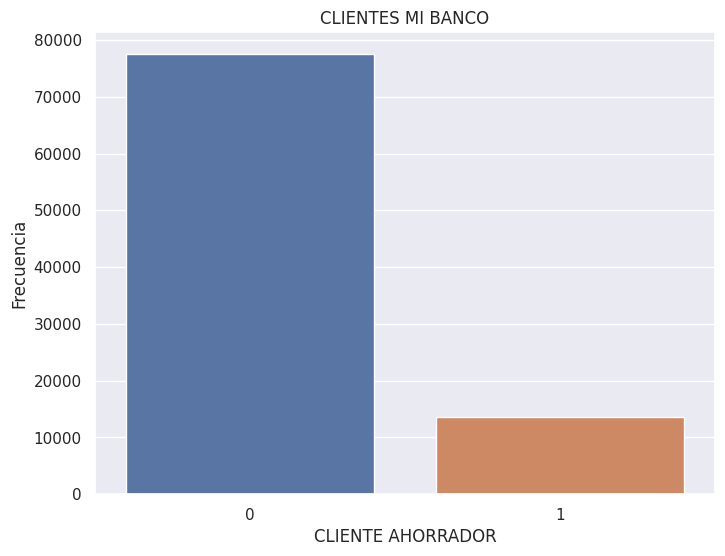

In [11]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

# Crear un gráfico de barras de los conteos de 'TARGET'
sns.countplot(x='TARGET', data=df_train)

# Añadir etiquetas y título
plt.title('CLIENTES MI BANCO')
plt.xlabel('CLIENTE AHORRADOR')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [12]:
df_train['TARGET'].value_counts(1)

0    0.849994
1    0.150006
Name: TARGET, dtype: float64

In [13]:
dfc[['PER_BANCARIZACION']].sort_values(by='PER_BANCARIZACION')

,PER_BANCARIZACION
43524,200601
41975,200601
120861,200601
41982,200601
120857,200601
...,...
36690,202301
45910,202301
75834,202301
76363,202301


In [14]:
# Suponiendo que df es tu DataFrame y 'PER_BANCARIZACION' es la columna
dfc['PER_BANCARIZACION'] = pd.to_datetime(dfc['PER_BANCARIZACION'], format='%Y%m')

# Crear nuevas columnas para el año y el mes
dfc['AÑO'] = dfc['PER_BANCARIZACION'].dt.year
dfc['MES'] = dfc['PER_BANCARIZACION'].dt.month

In [15]:
# Categorizar la variable 'PER_BANCARIZACION' en 5 rangos
#bins = [200601, 201001, 201501, 201901, 202301, float('inf')]  # Define los límites de los rangos
#labels = ['MUY ANTIGUO', 'ANTIGUO', 'MEDIO', 'NUEVO', 'MUY NUEVO']  # Etiquetas para cada rango
#dfc['PER_BANCARIZACION_Categoria'] = pd.cut(dfc['PER_BANCARIZACION'], bins=bins, labels=labels, right=False)

In [16]:
dfc

,ID,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,PER_BANCARIZACION,AÑO,MES
0,8bd775237f2f4c7cae87c255e9e71d62,1,48.0,CAJAMARCA,CONTUMAZA,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2013-07-01,2013,7
1,2409b242893e4ea4b7e6af1292030666,3,NaN,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2017-09-01,2017,9
2,65edb7eb9d144b2184ef76ec2c35cdf8,1,38.0,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2008-12-01,2008,12
3,2fef711096234036807b01a5a697a81c,1,61.0,TACNA,TACNA,"VTA. MIN. ALIMENTOS, BEBIDAS, TABACO.",2006-01-01,2006,1
4,796443da390d409ba3e7b775fde576cd,3,29.0,LAMBAYEQUE,CHICLAYO,OTRAS ACTIVID.DE TIPO SERVICIO NCP,2014-06-01,2014,6
...,...,...,...,...,...,...,...,...,...
151967,54a73b9c515f46d19c0182e3f44f44fe,3,25.0,NaN,NaN,VTA. MIN. PROD. FARMAC. Y ART. TOCADOR.,2021-08-01,2021,8
151968,1df55d6b6af544b58312d68241a10e4f,3,32.0,LAMBAYEQUE,CHICLAYO,TRANSPORTE DE CARGA POR CARRETERA.,2018-09-01,2018,9
151969,5dd4a95d877d4474a277173c6fe4d227,1,62.0,NaN,NaN,TRANSPORTE DE CARGA POR CARRETERA.,2006-01-01,2006,1
151970,cbad53becdb042cfb98a992566ec0e94,2,51.0,NaN,NaN,OTROS TIPOS DE VENTA AL POR MENOR.,2013-12-01,2013,12


In [17]:
dfb.head(5)

,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,CANT_EMP_DOL_NEG,SALDO_DOLA_NEG,CANT_EMP_DOL_CONS,SALDO_DOLA_CONS,CANT_EMP_DOL_HIPOT,SALDO_DOLA_HIPOT,MAX_LINEA_DISP_U6M
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,405.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,346.5666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,283.0869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,217.9872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,148.9428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1


In [18]:
dfb['Saldo_Total'] = dfb[['SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV', 'SALDO_CONS_NO_REV', 'SALDO_HIPOT']].sum(axis=1)

In [19]:
dfb['Relacion_Saldo_Linea_Credito'] = dfb['Saldo_Total'] / dfb['MAX_LINEA_DISP_U6M'].replace(0, 1)


In [20]:
### CREACION DE VARIABLES (VARIACION DE SALDOS)
dfb['Variacion_SALDO_MED_EMP'] = dfb.groupby('ID')['SALDO_MED_EMP'].diff()
dfb['Variacion_SALDO_MED_EMP'] = dfb['Variacion_SALDO_MED_EMP'].fillna(0)

dfb['Variacion_SALDO_PEQ_EMP'] = dfb.groupby('ID')['SALDO_PEQ_EMP'].diff()
dfb['Variacion_SALDO_PEQ_EMP'] = dfb['Variacion_SALDO_PEQ_EMP'].fillna(0)

dfb['Variacion_SALDO_MIC_EMP'] = dfb.groupby('ID')['SALDO_MIC_EMP'].diff()
dfb['Variacion_SALDO_MIC_EMP'] = dfb['Variacion_SALDO_MIC_EMP'].fillna(0)

In [21]:
dfb['Variacion_Consumo_Revolvente'] = dfb.groupby('ID')['SALDO_CONS_REV'].diff()
dfb['Variacion_Consumo_Revolvente'] = dfb['Variacion_Consumo_Revolvente'].fillna(0)

dfb['Variacion_Consumo_NO_Revolvente'] = dfb.groupby('ID')['SALDO_CONS_NO_REV'].diff()
dfb['Variacion_Consumo_NO_Revolvente'] = dfb['Variacion_Consumo_NO_Revolvente'].fillna(0)

In [22]:
# Crear variable de frecuencia de cambios en la línea de crédito
dfb['Cambios_Linea_Credito'] = dfb.groupby('ID')['MAX_LINEA_DISP_U6M'].diff().fillna(0)
sum_Cambios_Linea_Credito = dfb.groupby('ID')['Cambios_Linea_Credito'].sum().reset_index()

In [23]:
#CREAMOS LA VARIABLE MESES SIN SALDO VENCIDOS

dfb['Meses_sin_Saldos_Vencidos'] = dfb['SALDO_VENCIDO'].apply(lambda x: 1 if x == 0 else 0)
num_meses_sin_saldos_vencidos = dfb.groupby('ID')['Meses_sin_Saldos_Vencidos'].sum().reset_index()

In [24]:
# Crear variable de frecuencia de transacciones mensuales
dfb['Frecuencia_Transacciones'] = dfb[['SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP']].gt(0).sum(axis=1)
sum_Frecuencia_Transacciones = dfb.groupby('ID')['Frecuencia_Transacciones'].sum().reset_index()

In [25]:
sumtable = pd.merge(sum_Cambios_Linea_Credito, num_meses_sin_saldos_vencidos, on='ID', how='inner')
sumtable1 = pd.merge(sumtable, sum_Frecuencia_Transacciones, on='ID', how='inner')
sumtable1

,ID,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
0,00000ae64b2d4ea7b318f3caa49fb832,0.000,0,0
1,00002e673be949b1afe485e71ff71048,0.000,0,0
2,0000e7adc30c476ba07265c60676562c,0.000,9,9
3,00014b0427554bbbad91e0d8aeab3118,0.000,9,9
4,0001efa922ff405384514b5c6ed18294,0.000,9,0
...,...,...,...,...
151967,fffe81ac4d864cf5b21d80e1b39b6bde,0.000,9,9
151968,fffebeece7e3462c9ecd043d93bf8828,0.000,9,9
151969,ffff32ee7ea247bab950cfc94c7ba402,5312.450,9,0
151970,ffff49668d014875a2c5af50ac42695a,-137.522,9,0


In [26]:
dfb.head(5)

,PERIODO,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
0,202301,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,405.0000,0.0,0.0,...,405.0000,368.181818,0.0,0.0,0.0000,0.0,0.0,0.0,1,1
1,202302,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,346.5666,0.0,0.0,...,346.5666,315.060545,0.0,0.0,-58.4334,0.0,0.0,0.0,1,1
2,202303,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,283.0869,0.0,0.0,...,283.0869,257.351727,0.0,0.0,-63.4797,0.0,0.0,0.0,1,1
3,202304,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,217.9872,0.0,0.0,...,217.9872,198.170182,0.0,0.0,-65.0997,0.0,0.0,0.0,1,1
4,202305,858130171a01415f93d40802fc9e192d,1,0,0,0.0,0.0,148.9428,0.0,0.0,...,148.9428,135.402545,0.0,0.0,-69.0444,0.0,0.0,0.0,1,1


In [27]:
dfc.head()

,ID,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,PER_BANCARIZACION,AÑO,MES
0,8bd775237f2f4c7cae87c255e9e71d62,1,48.0,CAJAMARCA,CONTUMAZA,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2013-07-01,2013,7
1,2409b242893e4ea4b7e6af1292030666,3,NaN,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2017-09-01,2017,9
2,65edb7eb9d144b2184ef76ec2c35cdf8,1,38.0,NaN,NaN,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2008-12-01,2008,12
3,2fef711096234036807b01a5a697a81c,1,61.0,TACNA,TACNA,"VTA. MIN. ALIMENTOS, BEBIDAS, TABACO.",2006-01-01,2006,1
4,796443da390d409ba3e7b775fde576cd,3,29.0,LAMBAYEQUE,CHICLAYO,OTRAS ACTIVID.DE TIPO SERVICIO NCP,2014-06-01,2014,6


In [28]:
dfc.shape

(151972, 9)

In [29]:
missing_values = dfc.isnull().sum()/151972

# Muestra la cantidad de valores nulos por columna
print(missing_values)

ID                   0.000000
CO_TIPO_SEXO         0.000000
EDAD                 0.167176
NO_DEPARTAMENTO      0.498408
NO_PROVINCIA         0.498408
DE_CIIU              0.000000
PER_BANCARIZACION    0.000000
AÑO                  0.000000
MES                  0.000000
dtype: float64


<Axes: >

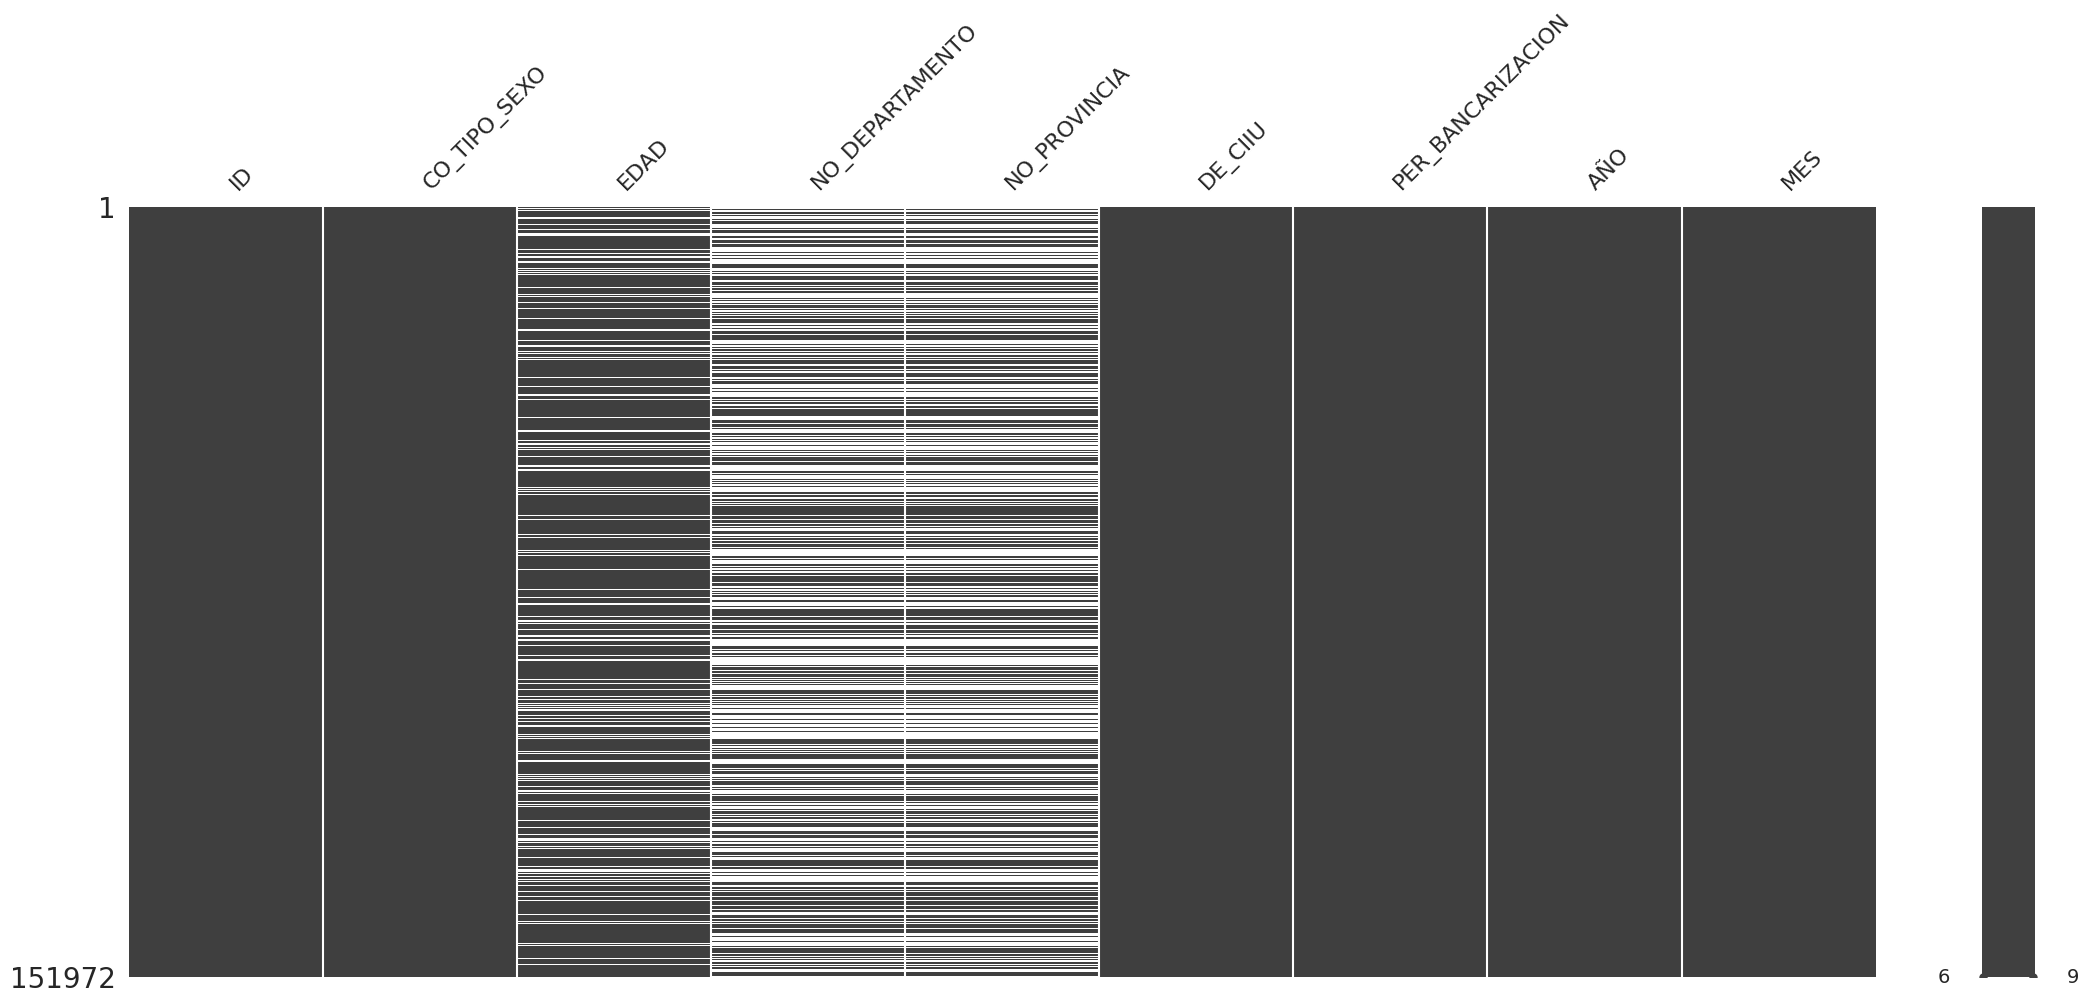

In [30]:
import missingno as msno
msno.matrix(dfc) #Observamos un patron en los missing en las variables NO_DEPARTAMENTO Y NO_PROVINCIA

### **TRABAJAMOS CON LA TABLA BALANCES PRIMERO**
------------------------


In [31]:
dfb.info() #Tenemos los datos completos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367748 entries, 0 to 1367747
Data columns (total 29 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   PERIODO                          1367748 non-null  int64  
 1   ID                               1367748 non-null  object 
 2   CANT_EMP_NEG                     1367748 non-null  int64  
 3   CANT_EMP_CONS                    1367748 non-null  int64  
 4   CANT_EMP_HIPOT                   1367748 non-null  int64  
 5   SALDO_MED_EMP                    1367748 non-null  float64
 6   SALDO_PEQ_EMP                    1367748 non-null  float64
 7   SALDO_MIC_EMP                    1367748 non-null  float64
 8   SALDO_CONS_REV                   1367748 non-null  float64
 9   SALDO_CONS_NO_REV                1367748 non-null  float64
 10  SALDO_HIPOT                      1367748 non-null  float64
 11  SALDO_VENCIDO                    1367748 non-null 

In [32]:

# data continua del cliente
var_1 = ['SALDO_MED_EMP', 'SALDO_PEQ_EMP','SALDO_MIC_EMP','SALDO_CONS_REV','SALDO_CONS_NO_REV',
         'SALDO_HIPOT','SALDO_VENCIDO','SALDO_DOLA_NEG','SALDO_DOLA_CONS', 'SALDO_DOLA_HIPOT', 'MAX_LINEA_DISP_U6M']

# data discreta
var_2 = ['CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT','CANT_EMP_DOL_NEG','CANT_EMP_DOL_CONS','CANT_EMP_DOL_HIPOT']

In [33]:
dfb.describe() #NUESTRA DATA CONTIENE MUCHOS OUTLIERS

,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
count,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,...,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06
mean,2.023050e+05,1.069871e+00,8.310946e-01,2.999017e-02,1.848944e+03,1.286906e+04,3.072459e+03,1.461633e+03,5.552291e+03,4.895342e+03,...,2.969973e+04,1.477306e+04,1.949773e+01,1.220049e+02,-8.810244e+00,5.833937e+00,1.198077e+00,5.733623e+01,8.812186e-01,6.616891e-01
std,2.581990e+00,8.547398e-01,1.100287e+00,1.732735e-01,4.253059e+04,3.084325e+04,9.974915e+03,6.819183e+03,4.436123e+04,4.698070e+04,...,8.679995e+04,5.626083e+04,8.642621e+03,9.533028e+03,5.631653e+03,2.352597e+03,1.463074e+04,3.122761e+03,3.235312e-01,4.942692e-01
min,2.023010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.545071e+04,-9.132264e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.545071e+04,-1.545071e+04,-1.859527e+06,-1.571723e+06,-1.367220e+06,-1.749281e+05,-1.411360e+07,-2.516441e+05,0.000000e+00,0.000000e+00
25%,2.023030e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.430000e+03,1.184899e+00,0.000000e+00,0.000000e+00,-8.117010e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.023050e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,9.360955e+03,1.286337e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,2.023070e+05,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,9.416638e+03,2.434449e+03,2.320500e+02,2.039154e+03,0.000000e+00,...,3.130754e+04,1.234545e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.023090e+05,1.000000e+01,1.400000e+01,3.000000e+00,1.020302e+07,1.571723e+06,1.383252e+06,3.953836e+05,1.476193e+07,2.413089e+06,...,1.491668e+07,1.491668e+07,1.926248e+06,1.046913e+06,1.383252e+06,2.115508e+05,3.935238e+06,4.311230e+05,1.000000e+00,2.000000e+00


## **GRAFICAS DE NUESTRAS VARIABLES CUANTITATIVAS DISCRETAS**
---

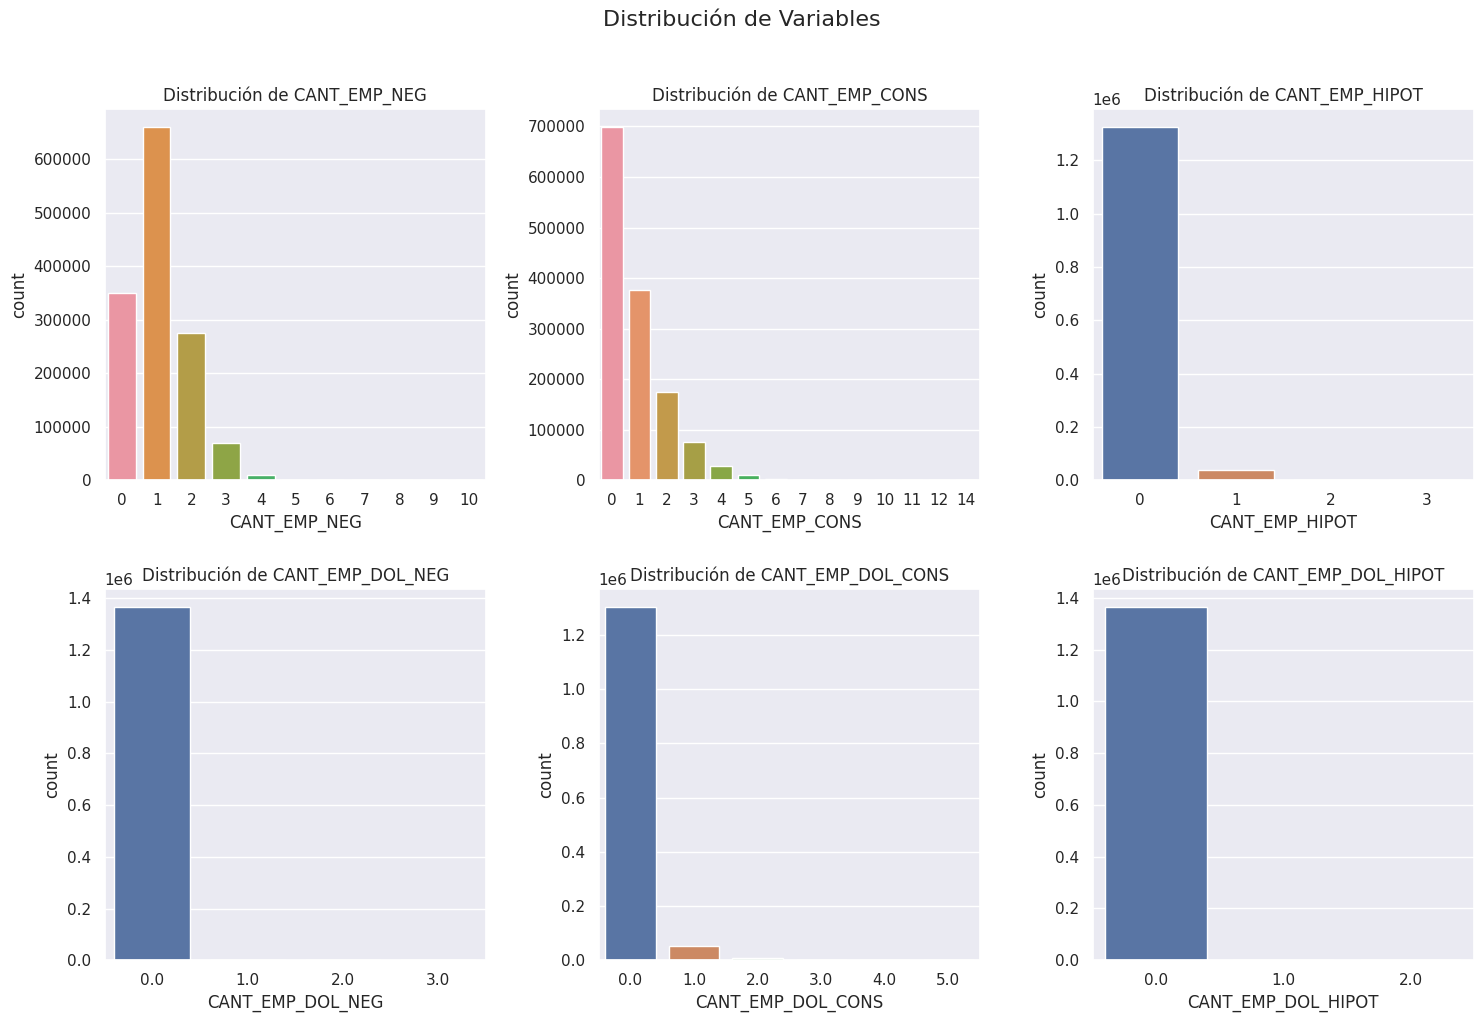

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el diseño de los subgráficos en una cuadrícula 2x3
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distribución de Variables', y=1.02, fontsize=16)

# Itera sobre las variables y genera los gráficos en la cuadrícula
for i, var in enumerate(var_2):
    row = i // 3  # Calcula el número de fila
    col = i % 3   # Calcula el número de columna
    sns.countplot(x=var, data=dfb, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los gráficos
plt.show()

## **GRAFICAS DE NUESTRAS VARIABLES CUANTITATIVAS CONTINUAS**
---

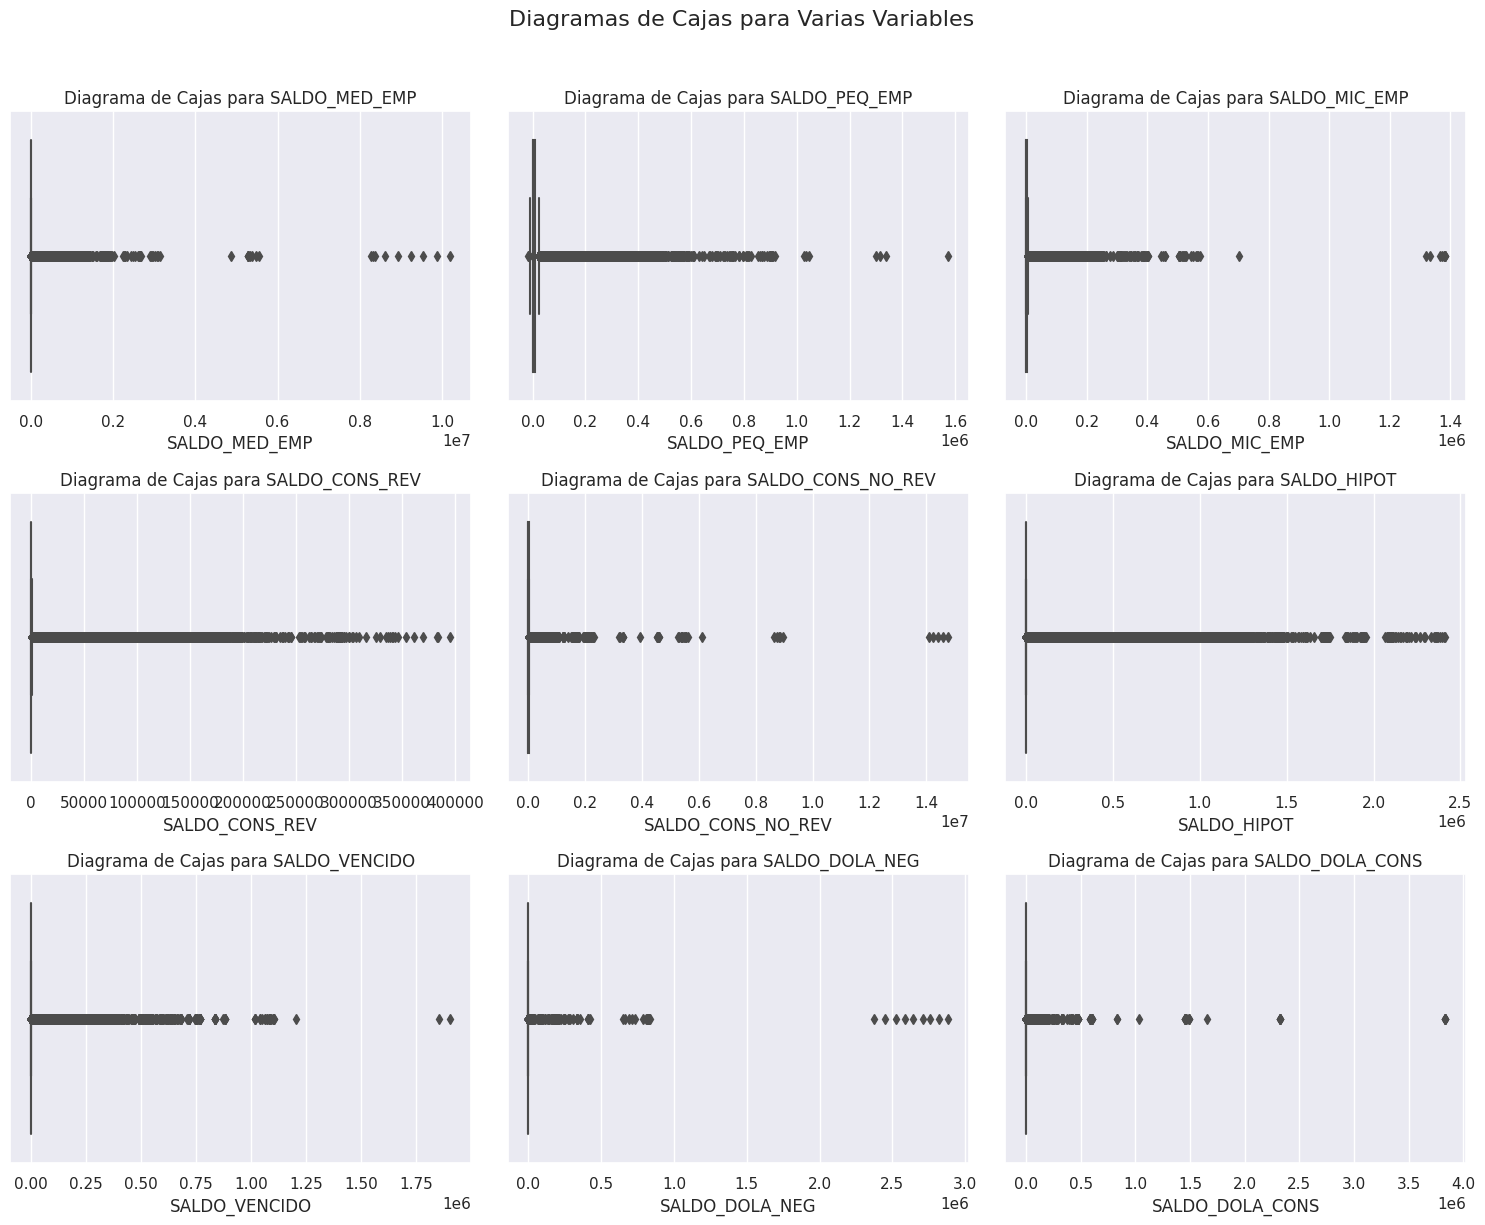

In [35]:
# Configura el diseño de los subgráficos en una cuadrícula de 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Diagramas de Cajas para Varias Variables', y=1.02, fontsize=16)

# Itera sobre las variables y genera los boxplots en la cuadrícula
for i, var in enumerate(['SALDO_MED_EMP',
 'SALDO_PEQ_EMP',
 'SALDO_MIC_EMP',
 'SALDO_CONS_REV',
 'SALDO_CONS_NO_REV',
 'SALDO_HIPOT',
 'SALDO_VENCIDO',
 'SALDO_DOLA_NEG',
 'SALDO_DOLA_CONS']):

    # Calcula la posición del subgráfico en la cuadrícula
    row = i // 3
    col = i % 3

    sns.boxplot(x=dfb[var], ax=axes[row, col])
    axes[row, col].set_title(f'Diagrama de Cajas para {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los boxplots
plt.show()

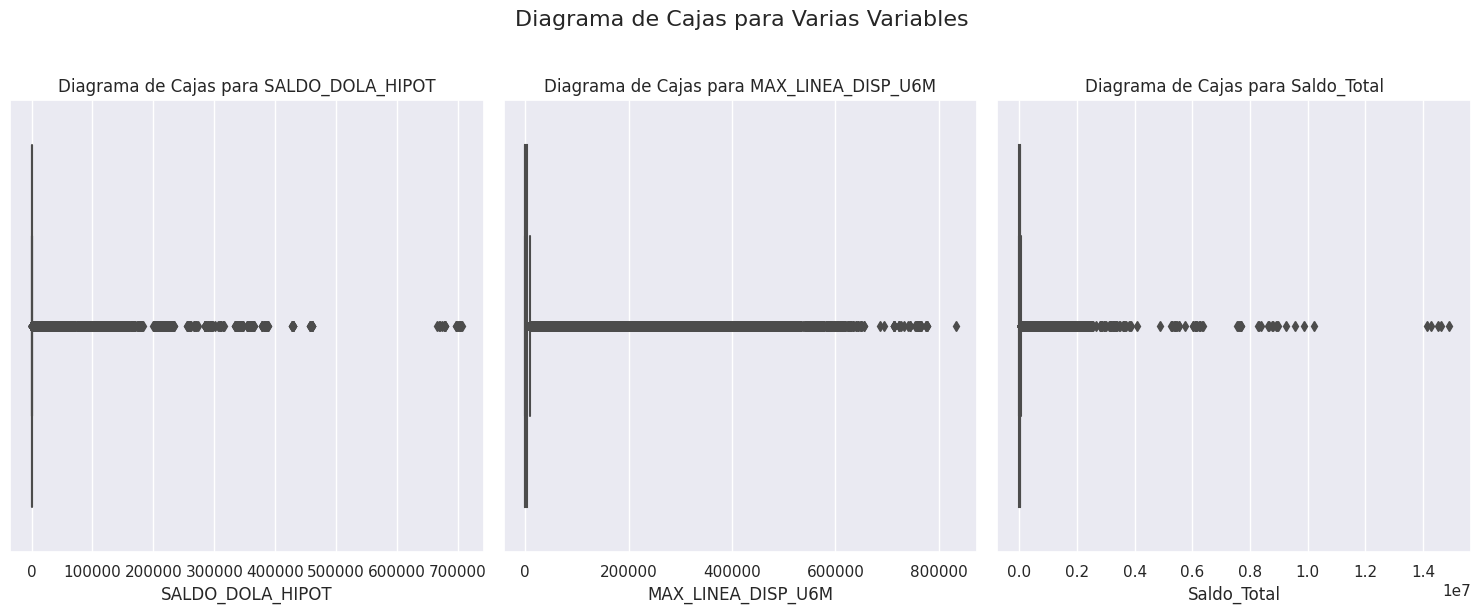

In [36]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
fig.suptitle('Diagrama de Cajas para Varias Variables', y=1.02, fontsize=16)

# Itera sobre las variables y genera los boxplots en la cuadrícula
for i, var in enumerate([ 'SALDO_DOLA_HIPOT',
 'MAX_LINEA_DISP_U6M',
               'Saldo_Total'
                          ]):
    # Elimina valores nulos antes de trazar el boxplot
    data_without_na = dfb[var].dropna()
    sns.boxplot(x=data_without_na, ax=axes[i])
    axes[i].set_title(f'Diagrama de Cajas para {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los boxplots
plt.show()

In [37]:
dfb[var_1].describe()

,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,SALDO_DOLA_NEG,SALDO_DOLA_CONS,SALDO_DOLA_HIPOT,MAX_LINEA_DISP_U6M
count,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06,1.367748e+06
mean,1.848944e+03,1.286906e+04,3.072459e+03,1.461633e+03,5.552291e+03,4.895342e+03,1.410466e+03,3.881828e+01,1.192071e+02,1.071938e+02,1.033724e+04
std,4.253059e+04,3.084325e+04,9.974915e+03,6.819183e+03,4.436123e+04,4.698070e+04,1.382206e+04,7.403591e+03,1.029929e+04,5.026280e+03,3.454299e+04
min,0.000000e+00,-1.545071e+04,-9.132264e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,9.416638e+03,2.434449e+03,2.320500e+02,2.039154e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.740000e+03
max,1.020302e+07,1.571723e+06,1.383252e+06,3.953836e+05,1.476193e+07,2.413089e+06,1.903748e+06,2.880937e+06,3.836260e+06,7.066121e+05,8.328511e+05


In [38]:
dfb_agp = dfb.groupby('ID').mean() #AGRUPAMOS POR EL ID DEL CLIENTE Y CALCULAMOS LA MEDIA  A NUESTRA DATA BALANCES


In [39]:
dfb_agp.sample(5)

,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
ID,,,,,,,,,,,,,,,,,,,,,
ea3d9bd6f7694f85b9ec42863c1226dd,202305.0,1.000000,1.000000,0.0,0.0,0.000000,5285.9484,882.982100,0.000000,0.0,...,6168.930500,1.515708,0.0,0.000000,-87.2046,51.747656,0.000000,0.000000,1.0,1.000000
7453d8513f8142cfa7eed2ee26acf8d0,202305.0,2.000000,0.000000,0.0,0.0,98032.564667,0.0000,0.000000,0.000000,0.0,...,98032.564667,98032.564667,0.0,1629.198489,0.0000,0.000000,0.000000,0.000000,1.0,1.000000
7a4b3fa4fb7242d18215a3b5576f1371,202305.0,0.777778,1.555556,0.0,0.0,0.000000,3345.9966,1533.500656,0.000000,0.0,...,4879.497256,0.099880,0.0,0.000000,730.2582,34.273633,0.000000,2163.333333,1.0,0.777778
809d13fa57184aaeafa27fb349599a03,202305.0,1.000000,0.000000,0.0,0.0,49596.829022,0.0000,0.000000,0.000000,0.0,...,49596.829022,49596.829022,0.0,845.510978,0.0000,0.000000,0.000000,0.000000,1.0,1.000000
088668409215493c904804e28d9237ac,202305.0,0.555556,1.333333,0.0,0.0,0.000000,4845.2589,0.000000,1555.087078,0.0,...,6400.345978,6400.345978,0.0,0.000000,856.0818,0.000000,-344.729433,0.000000,1.0,0.555556


In [40]:
# REDONDEAMOS LAS VARIABLES DISCRETAS
dfb_agp[var_2] = dfb_agp[var_2].round(0)


In [41]:
dfb_agp.head(5)

,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
ID,,,,,,,,,,,,,,,,,,,,,
00000ae64b2d4ea7b318f3caa49fb832,202305.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
00002e673be949b1afe485e71ff71048,202305.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
0000e7adc30c476ba07265c60676562c,202305.0,2.0,2.0,0.0,0.0,38978.653689,0.0,0.0,27035.078167,0.0,...,66013.731856,11.196359,0.0,3115.427467,0.0,0.0,-1713.468600,0.0,1.0,1.0
00014b0427554bbbad91e0d8aeab3118,202305.0,2.0,0.0,0.0,0.0,42683.458622,0.0,0.0,0.000000,0.0,...,42683.458622,42683.458622,0.0,-829.064578,0.0,0.0,0.000000,0.0,1.0,1.0
0001efa922ff405384514b5c6ed18294,202305.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,4329.417411,0.0,...,4329.417411,4329.417411,0.0,0.000000,0.0,0.0,-202.772689,0.0,1.0,0.0


In [42]:
dfb_agp.drop(['Cambios_Linea_Credito', 'Meses_sin_Saldos_Vencidos','Frecuencia_Transacciones'], axis=1, inplace=True) #ELIMINAMOS VARIABLES QUE NO SON DE USO YA QUE LAS UNIREMOS CON LA TABLA CREADA ANTERIORMETE (sumtable1)

In [43]:
dfb_agp = pd.merge(dfb_agp, sumtable1, on='ID', how='inner')

In [44]:
dfb_agp.sample(5)

,ID,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
100307,a8a4cf9c1a3746dd803453088245ac6f,202305.0,1.0,0.0,0.0,0.0,7300.348044,1239.0174,0.000000,0.000000,...,8539.365444,8539.365444,0.0,-3310.118356,607.0725,0.000000,0.000000,0.0,9,9
143062,f0da28e096ec479ab89b433eafcad905,202305.0,1.0,0.0,0.0,0.0,0.000000,876.3840,0.000000,0.000000,...,876.384000,876.384000,0.0,0.000000,-50.6511,0.000000,0.000000,0.0,9,9
53699,5a4dd2f1ae9649c58e7c0f6d79b4a374,202305.0,0.0,2.0,0.0,0.0,0.000000,0.0000,688.510044,11308.904933,...,11997.414978,6.087829,0.0,0.000000,0.0000,152.942689,-445.165889,2970.0,9,0
10540,11f7f9277cc444c9ae6521047c1b025b,202305.0,2.0,1.0,0.0,0.0,0.000000,6570.9855,0.000000,3203.705011,...,9774.690511,9774.690511,0.0,0.000000,489.2679,0.000000,557.097844,0.0,7,9
18147,1eb03941bead4a8681e6f7b5807e35c6,202305.0,1.0,0.0,0.0,0.0,20158.992400,0.0000,0.000000,0.000000,...,20158.992400,20158.992400,0.0,915.677556,0.0000,0.000000,0.000000,0.0,9,9


In [45]:
dfb_agp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               151972 non-null  object 
 1   PERIODO                          151972 non-null  float64
 2   CANT_EMP_NEG                     151972 non-null  float64
 3   CANT_EMP_CONS                    151972 non-null  float64
 4   CANT_EMP_HIPOT                   151972 non-null  float64
 5   SALDO_MED_EMP                    151972 non-null  float64
 6   SALDO_PEQ_EMP                    151972 non-null  float64
 7   SALDO_MIC_EMP                    151972 non-null  float64
 8   SALDO_CONS_REV                   151972 non-null  float64
 9   SALDO_CONS_NO_REV                151972 non-null  float64
 10  SALDO_HIPOT                      151972 non-null  float64
 11  SALDO_VENCIDO                    151972 non-null  float64
 12  CA

In [46]:
dfb_agp[var_2] = dfb_agp[var_2].astype(int)


In [47]:
dfb_agp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               151972 non-null  object 
 1   PERIODO                          151972 non-null  float64
 2   CANT_EMP_NEG                     151972 non-null  int64  
 3   CANT_EMP_CONS                    151972 non-null  int64  
 4   CANT_EMP_HIPOT                   151972 non-null  int64  
 5   SALDO_MED_EMP                    151972 non-null  float64
 6   SALDO_PEQ_EMP                    151972 non-null  float64
 7   SALDO_MIC_EMP                    151972 non-null  float64
 8   SALDO_CONS_REV                   151972 non-null  float64
 9   SALDO_CONS_NO_REV                151972 non-null  float64
 10  SALDO_HIPOT                      151972 non-null  float64
 11  SALDO_VENCIDO                    151972 non-null  float64
 12  CA

In [48]:
dfb_agp.sample(5)

,ID,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,...,Saldo_Total,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones
102969,ad13560c1f224e1a829140dcc1e23831,202305.0,0,1,0,0.0,0.000000,0.0000,0.0,6529.681933,...,6529.681933,1.484019,0.0,0.000000,0.0000,0.0,-1286.037044,0.0,9,0
12571,15624048941b49c599adde2c536c6bf6,202305.0,2,0,0,0.0,65909.596533,0.0000,0.0,0.000000,...,65909.596533,59.917815,0.0,2311.823733,0.0000,0.0,0.000000,0.0,9,9
42870,48724296b6174783aab39d38a21b65ea,202305.0,3,0,0,0.0,24650.151600,0.0000,0.0,0.000000,...,24650.151600,24650.151600,0.0,-2445.142089,0.0000,0.0,0.000000,0.0,8,9
97883,a487acf94df043058e3fb25ad425db97,202305.0,1,0,0,0.0,0.000000,10401.7725,0.0,0.000000,...,10401.772500,10401.772500,0.0,0.000000,-284.5422,0.0,0.000000,0.0,9,9
102296,abf5726868344af389eeef32c88eff2f,202305.0,3,1,0,0.0,60684.640444,0.0000,0.0,4625.196211,...,65309.836656,65309.836656,0.0,-610.303644,0.0000,0.0,616.213211,0.0,9,9


In [49]:
dfb_agp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               151972 non-null  object 
 1   PERIODO                          151972 non-null  float64
 2   CANT_EMP_NEG                     151972 non-null  int64  
 3   CANT_EMP_CONS                    151972 non-null  int64  
 4   CANT_EMP_HIPOT                   151972 non-null  int64  
 5   SALDO_MED_EMP                    151972 non-null  float64
 6   SALDO_PEQ_EMP                    151972 non-null  float64
 7   SALDO_MIC_EMP                    151972 non-null  float64
 8   SALDO_CONS_REV                   151972 non-null  float64
 9   SALDO_CONS_NO_REV                151972 non-null  float64
 10  SALDO_HIPOT                      151972 non-null  float64
 11  SALDO_VENCIDO                    151972 non-null  float64
 12  CA

In [50]:
# Realizar un join basado en la columna 'ID'
df = pd.merge(dfb_agp, df_testrain, on='ID', how='inner')

In [51]:
df.sample(5)

,ID,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,...,Relacion_Saldo_Linea_Credito,Variacion_SALDO_MED_EMP,Variacion_SALDO_PEQ_EMP,Variacion_SALDO_MIC_EMP,Variacion_Consumo_Revolvente,Variacion_Consumo_NO_Revolvente,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones,TARGET
86944,920ee6ec57884c1b9429c702abf96a45,202305.0,1,1,0,0.0,0.0,1464.3270,515.418944,0.000000,...,0.950541,0.0,0.0,322.8354,9.796656,0.000000,1650.0,9,7,0.0
116030,c3031c2b752b444cb26926d958258d3f,202305.0,1,0,0,0.0,0.0,1993.4235,0.000000,0.000000,...,1993.423500,0.0,0.0,131.1012,0.000000,0.000000,0.0,9,9,1.0
144064,f28f3e0ff4194a76baa48b1fa0fb17dc,202305.0,1,0,0,0.0,0.0,2637.7992,0.000000,0.000000,...,1283.848474,0.0,0.0,305.9892,0.000000,0.000000,1650.0,9,9,0.0
41381,45eff5ebff30479488b38668a5d7a7de,202305.0,0,3,0,0.0,0.0,0.0000,3232.754778,9517.951222,...,1.416714,0.0,0.0,0.0000,-145.340144,-862.358011,0.0,9,0,NaN
134511,e277393647bb41c1b8dac040ff08df8e,202305.0,0,1,0,0.0,0.0,0.0000,0.000000,30710.616967,...,27222.584746,0.0,0.0,0.0000,0.000000,-356.251678,-3080.0,8,0,0.0


In [52]:
df['TARGET'].value_counts(1) #Observamos que nuestra variable Target esta desbalanceada

0.0    0.849994
1.0    0.150006
Name: TARGET, dtype: float64

In [53]:
# Realizar un join basado en la columna 'ID'
data = pd.merge(df, dfc, on='ID', how='inner')

In [54]:
data.head()

,ID,PERIODO,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,...,Frecuencia_Transacciones,TARGET,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,PER_BANCARIZACION,AÑO,MES
0,00000ae64b2d4ea7b318f3caa49fb832,202305.0,1,0,0,0.0,0.000000,0.0,0.0,0.000000,...,0,NaN,1,52.0,AREQUIPA,ISLAY,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2007-11-01,2007,11
1,00002e673be949b1afe485e71ff71048,202305.0,1,0,0,0.0,0.000000,0.0,0.0,0.000000,...,0,0.0,1,61.0,HUANCAVELICA,HUANCAVELICA,"VTA. MIN. PRODUCTOS TEXTILES, CALZADO.",2006-01-01,2006,1
2,0000e7adc30c476ba07265c60676562c,202305.0,2,2,0,0.0,38978.653689,0.0,0.0,27035.078167,...,9,NaN,2,49.0,AREQUIPA,AREQUIPA,VTA. MAY. MATERIALES DE CONSTRUCCION.,2006-11-01,2006,11
3,00014b0427554bbbad91e0d8aeab3118,202305.0,2,0,0,0.0,42683.458622,0.0,0.0,0.000000,...,9,0.0,1,43.0,AYACUCHO,HUAMANGA,VTA. MAY. MATERIALES DE CONSTRUCCION.,2006-01-01,2006,1
4,0001efa922ff405384514b5c6ed18294,202305.0,1,1,0,0.0,0.000000,0.0,0.0,4329.417411,...,0,0.0,2,56.0,MOQUEGUA,ILO,OTRAS ACTIVIDADES NO CLASIFICAD.EN OTRA PARTE\r\n,2014-09-01,2014,9


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   ID                               151972 non-null  object        
 1   PERIODO                          151972 non-null  float64       
 2   CANT_EMP_NEG                     151972 non-null  int64         
 3   CANT_EMP_CONS                    151972 non-null  int64         
 4   CANT_EMP_HIPOT                   151972 non-null  int64         
 5   SALDO_MED_EMP                    151972 non-null  float64       
 6   SALDO_PEQ_EMP                    151972 non-null  float64       
 7   SALDO_MIC_EMP                    151972 non-null  float64       
 8   SALDO_CONS_REV                   151972 non-null  float64       
 9   SALDO_CONS_NO_REV                151972 non-null  float64       
 10  SALDO_HIPOT                      151972 non-

<Axes: >

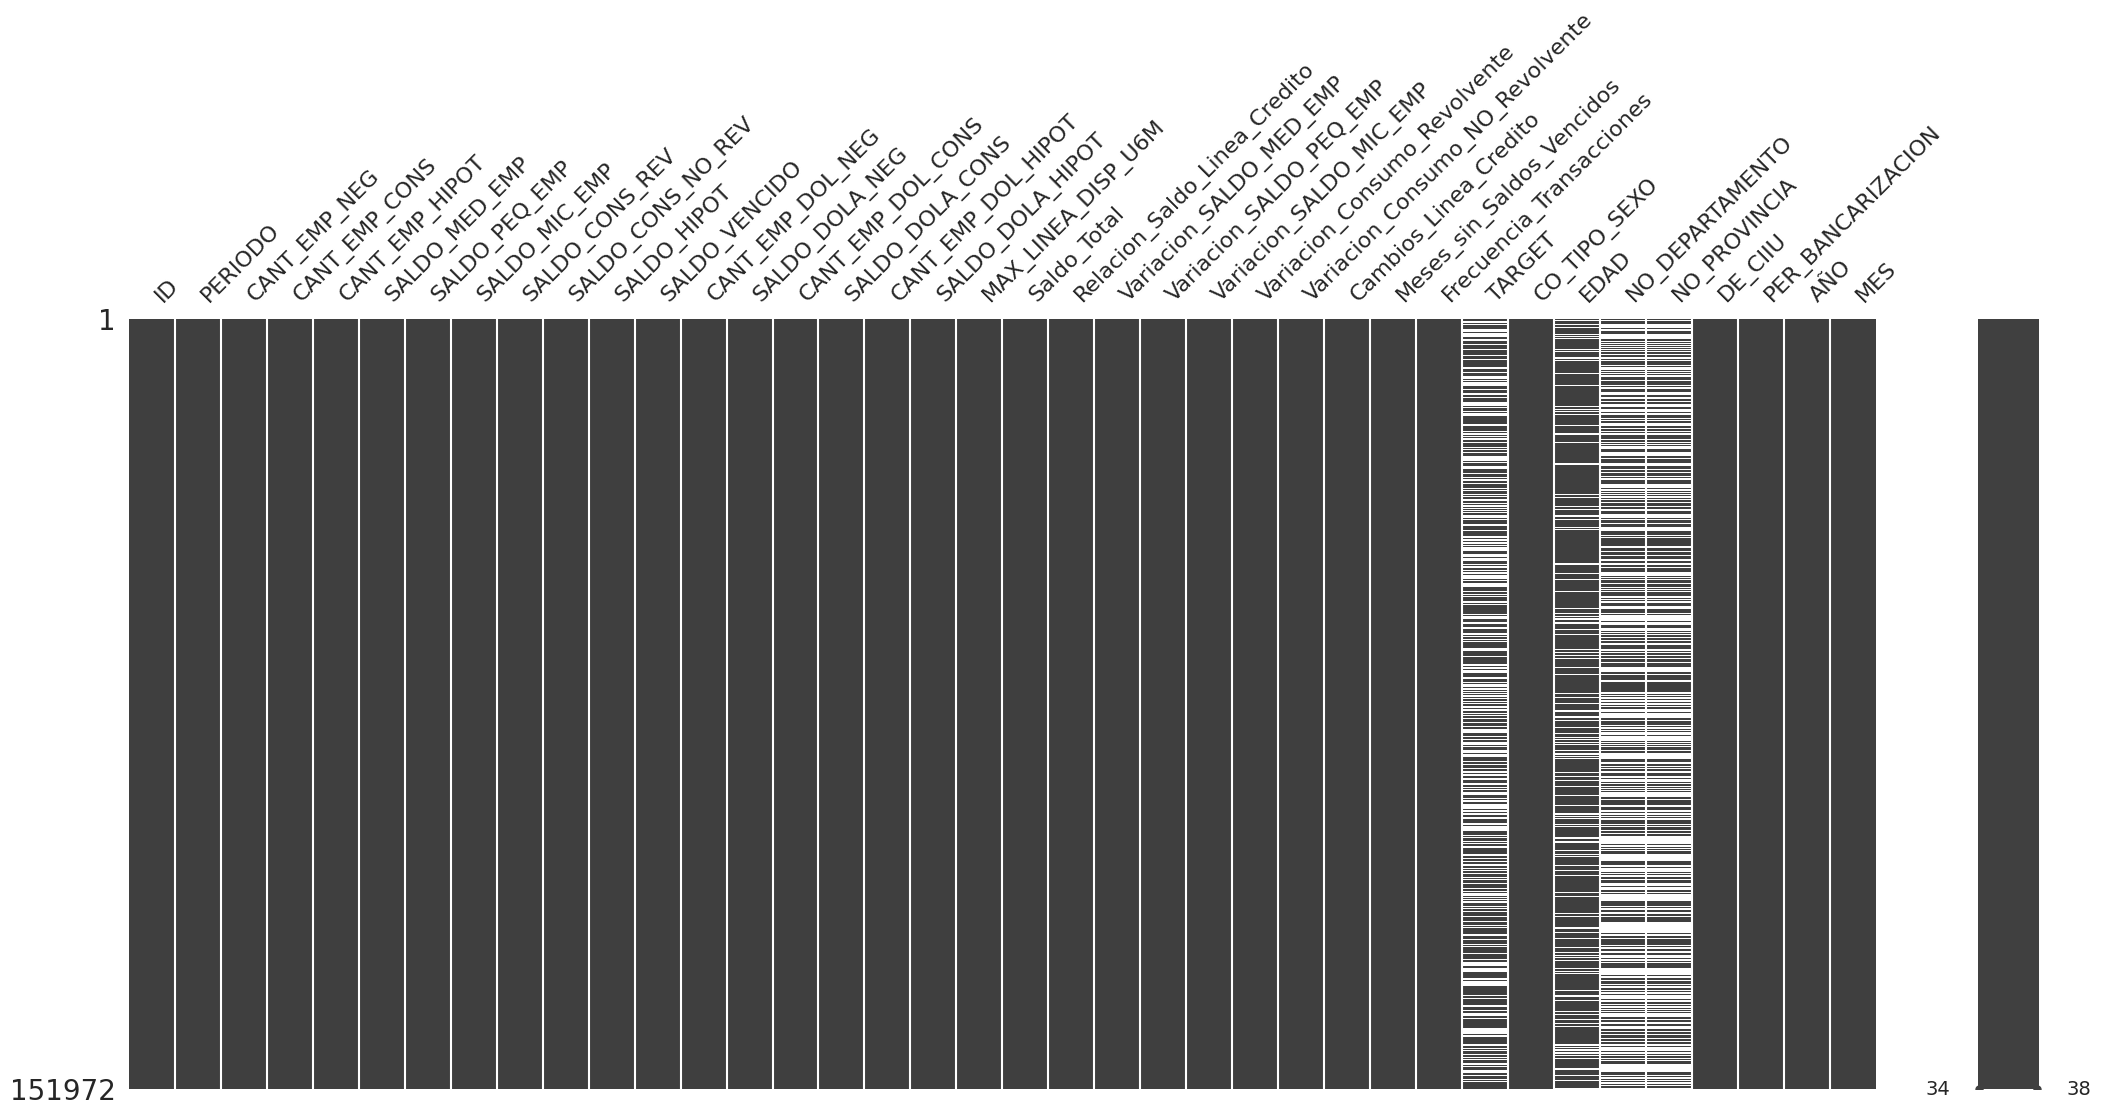

In [56]:
msno.matrix(data)

# **EDA**    
---

TARGET                  
              count     sum      mean
CANT_EMP_NEG                         
0             23054  7208.0  0.312657
1             43921  4566.0  0.103959
2             19225  1592.0  0.082809
3              4412   275.0  0.062330
4               529    35.0  0.066163
5                39     2.0  0.051282
6                 2     0.0  0.000000
10                1     0.0  0.000000

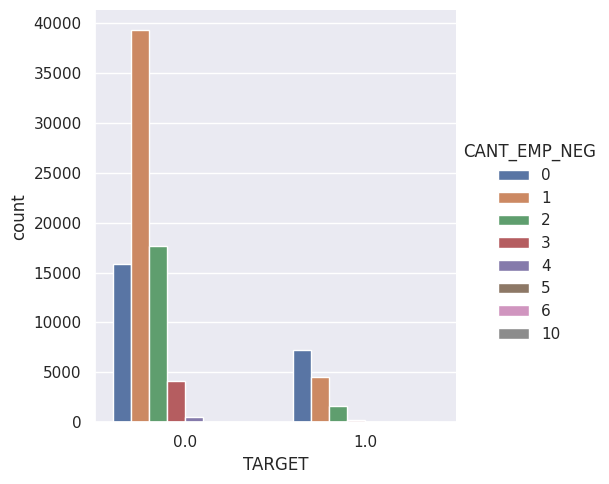

In [57]:
sns.catplot(x='TARGET',data=data,hue='CANT_EMP_NEG',kind="count")
data[['CANT_EMP_NEG', 'TARGET']].groupby(['CANT_EMP_NEG'], as_index=False).agg(['count','sum','mean'])

TARGET                  
               count     sum      mean
CANT_EMP_CONS                         
0              45931  4542.0  0.098887
1              25314  4718.0  0.186379
2              12260  2797.0  0.228140
3               5065  1100.0  0.217177
4               1824   342.0  0.187500
5                575   135.0  0.234783
6                171    35.0  0.204678
7                 34     6.0  0.176471
8                  7     2.0  0.285714
9                  2     1.0  0.500000

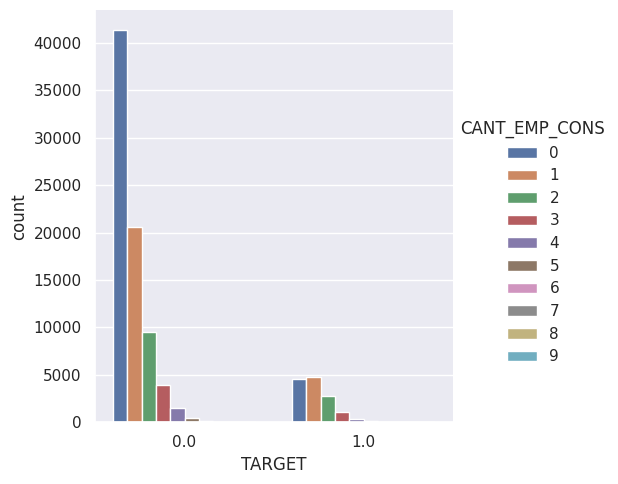

In [58]:
sns.catplot(x='TARGET',data=data,hue='CANT_EMP_CONS',kind="count")
data[['CANT_EMP_CONS', 'TARGET']].groupby(['CANT_EMP_CONS'], as_index=False).agg(['count','sum','mean'])

TARGET                   
                    count      sum      mean
CANT_EMP_DOL_HIPOT                          
0                   91069  13597.0  0.149304
1                     112     79.0  0.705357
2                       2      2.0  1.000000

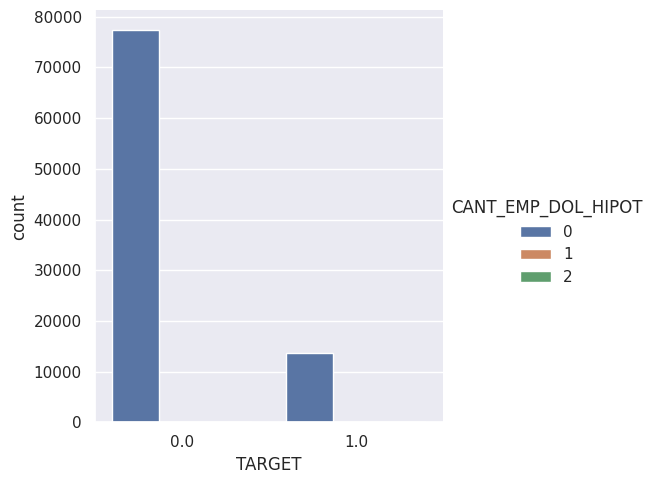

In [59]:
sns.catplot(x='TARGET',data=data,hue='CANT_EMP_DOL_HIPOT',kind="count")
data[['CANT_EMP_DOL_HIPOT', 'TARGET']].groupby(['CANT_EMP_DOL_HIPOT'], as_index=False).agg(['count','sum','mean'])

TARGET                   
                           count      sum      mean
Meses_sin_Saldos_Vencidos                          
0                           5832    106.0  0.018176
1                            789     12.0  0.015209
2                            967     24.0  0.024819
3                           1214     26.0  0.021417
4                           1455     50.0  0.034364
5                           1726     72.0  0.041715
6                           1622     81.0  0.049938
7                           1729     97.0  0.056102
8                           2497    183.0  0.073288
9                          73352  13027.0  0.177596

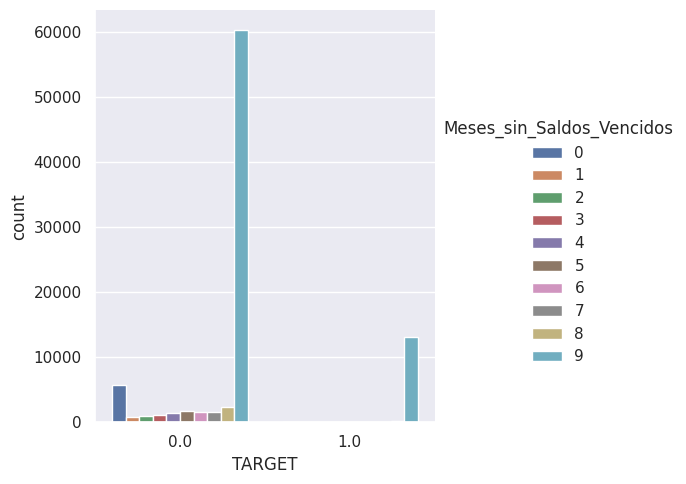

In [60]:
sns.catplot(x='TARGET',data=data,hue='Meses_sin_Saldos_Vencidos',kind="count")
data[['Meses_sin_Saldos_Vencidos', 'TARGET']].groupby(['Meses_sin_Saldos_Vencidos'], as_index=False).agg(['count','sum','mean'])

TARGET                  
                          count     sum      mean
Frecuencia_Transacciones                         
0                         26386  7085.0  0.268514
1                           929   131.0  0.141012
2                          1255   151.0  0.120319
3                          1340   112.0  0.083582
4                          1506   130.0  0.086321
5                          1590   139.0  0.087421
6                          1748   137.0  0.078375
7                          2064   178.0  0.086240
8                          2438   221.0  0.090648
9                         49158  5146.0  0.104683
10                         1149    96.0  0.083551
11                          423    43.0  0.101655
12                          292    31.0  0.106164
13                          256    27.0  0.105469
14                          212    12.0  0.056604
15                          167    15.0  0.089820
16                           81    11.0  0.135802
17                           66     6.0  0.090909
18                          123     7.0  0.056911

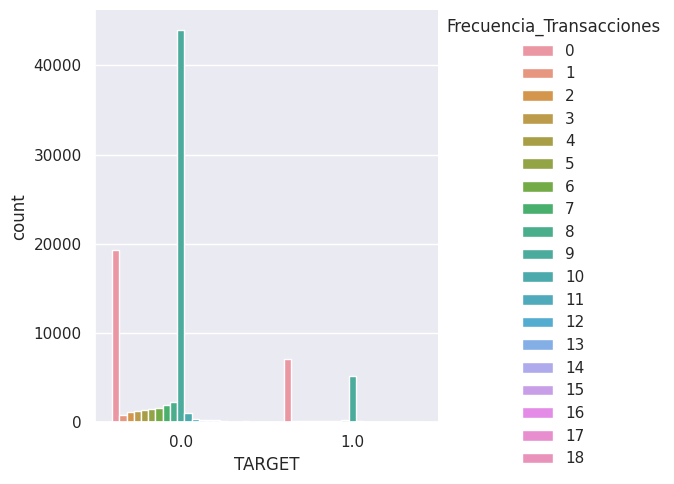

In [61]:
sns.catplot(x='TARGET',data=data,hue='Frecuencia_Transacciones',kind="count")
data[['Frecuencia_Transacciones', 'TARGET']].groupby(['Frecuencia_Transacciones'], as_index=False).agg(['count','sum','mean'])

TARGET                  
              count     sum      mean
CO_TIPO_SEXO                         
1             30000  5076.0  0.169200
2             31343  5747.0  0.183358
3             29840  2855.0  0.095677

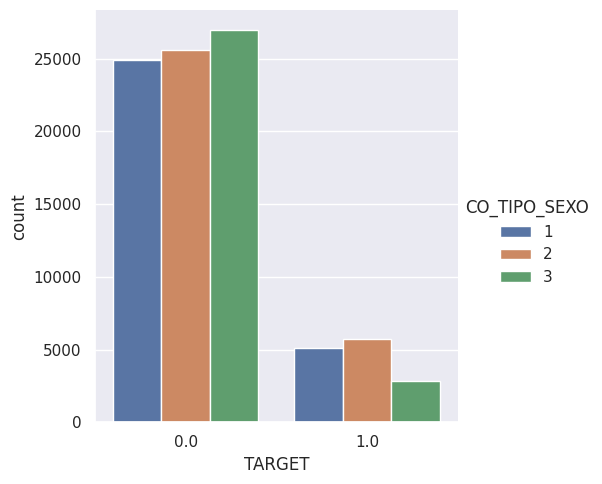

In [62]:
sns.catplot(x='TARGET',data=data,hue='CO_TIPO_SEXO',kind="count")
data[['CO_TIPO_SEXO', 'TARGET']].groupby(['CO_TIPO_SEXO'], as_index=False).agg(['count','sum','mean'])

TARGET                  
                 count     sum      mean
NO_DEPARTAMENTO                         
AMAZONAS           709    51.0  0.071932
ANCASH            2892   416.0  0.143845
APURIMAC           434    49.0  0.112903
AREQUIPA          4291   518.0  0.120718
AYACUCHO          1095    64.0  0.058447
CAJAMARCA         3451   285.0  0.082585
CALLAO            1175   136.0  0.115745
CUSCO              237    18.0  0.075949
HUANCAVELICA      1060   130.0  0.122642
HUANUCO           1142   142.0  0.124343
ICA               1693   251.0  0.148258
JUNIN             3529   482.0  0.136583
LA LIBERTAD       2118   200.0  0.094429
LAMBAYEQUE       10244  2801.0  0.273428
LIMA               488    52.0  0.106557
LORETO             294    38.0  0.129252
MADRE DE DIOS      817    92.0  0.112607
MOQUEGUA           254    38.0  0.149606
PASCO             2861   210.0  0.073401
PIURA             1772   142.0  0.080135
PUNO              1199    94.0  0.078399
SAN MARTIN         683    91.0  0.133236
TACNA              723    68.0  0.094053
TUMBES            1909   476.0  0.249345
UCAYALI            640    66.0  0.103125

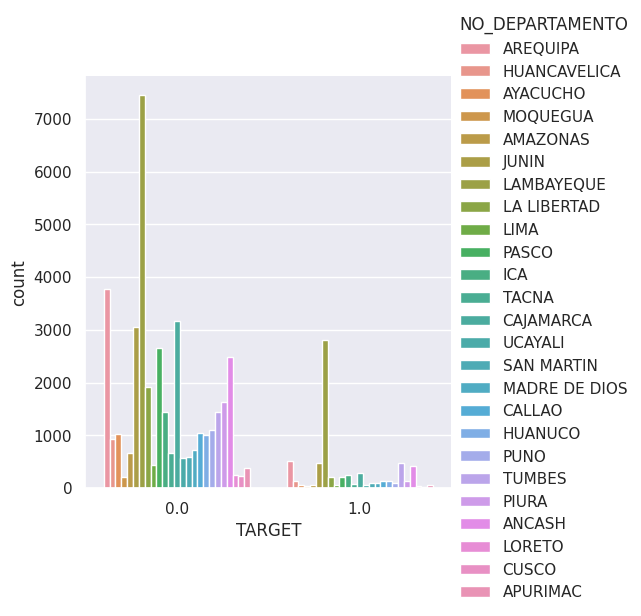

In [63]:
sns.catplot(x='TARGET',data=data,hue='NO_DEPARTAMENTO',kind="count")
data[['NO_DEPARTAMENTO', 'TARGET']].groupby(['NO_DEPARTAMENTO'], as_index=False).agg(['count','sum','mean'])

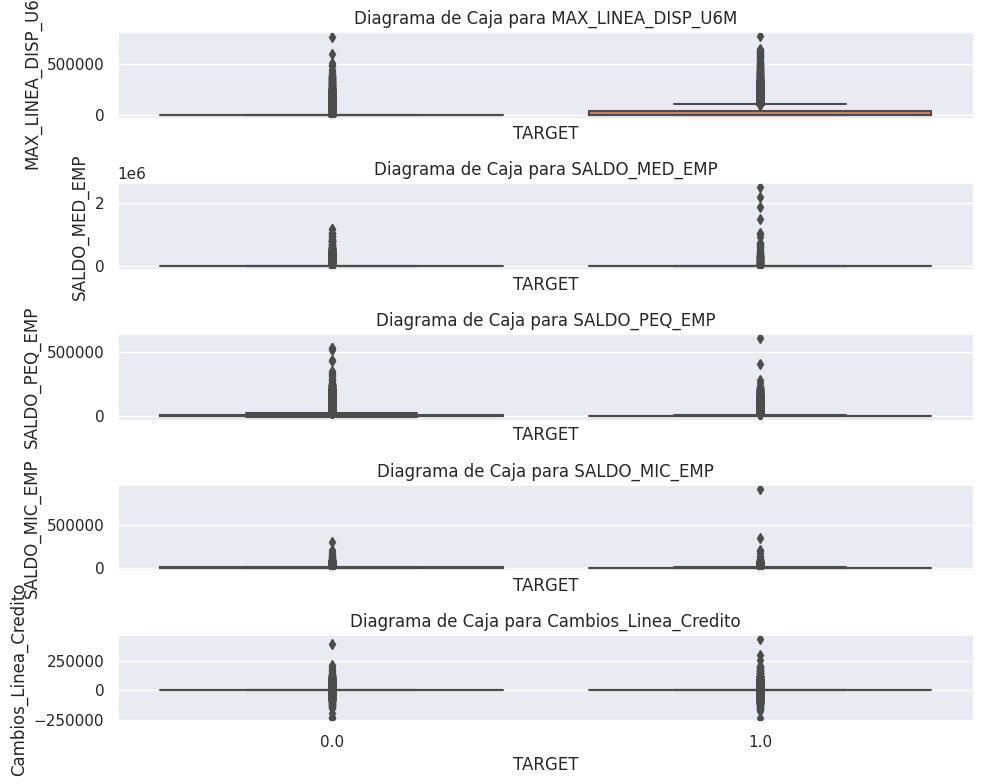

In [64]:
# Selecciona las variables que deseas incluir en los boxplots
variables_interes = ['MAX_LINEA_DISP_U6M', 'SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'Cambios_Linea_Credito']

# Configura el diseño de los subgráficos en una cuadrícula
fig, axes = plt.subplots(nrows=len(variables_interes), figsize=(10, 8), sharex=True)

# Itera sobre las variables y genera los boxplots
for i, var in enumerate(variables_interes):
    sns.boxplot(x='TARGET', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Diagrama de Caja para {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los boxplots
plt.show()

##### **REALIZAMOS LA PRUEBA T PARA VER SI EXISTEN DIFERENCIAS DE MEDIA ENTRE LAS VARIABLES Y LAS CATEGORIAS DE LA VARIABLE TARGET**
---

In [65]:
from scipy.stats import ttest_ind

df_si = data[data['TARGET'] == 1]
df_no = data[data['TARGET'] == 0]
pvalor = []

for x in np.array(data.columns)[3:]:
    vaar1 = pd.to_numeric(df_si[x], errors='coerce')
    vaar2 = pd.to_numeric(df_no[x], errors='coerce')

    # Elimina los valores NaN después de la conversión
    vaar1 = vaar1.dropna()
    vaar2 = vaar2.dropna()

    pvalor.append(ttest_ind(vaar1, vaar2).pvalue)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [66]:
pd.DataFrame({'Variable':np.array(data.columns)[3:],
              'P_Valor': pvalor}).sort_values('P_Valor', ascending = True)

,Variable,P_Valor
0,CANT_EMP_CONS,0.000000e+00
32,PER_BANCARIZACION,0.000000e+00
26,TARGET,0.000000e+00
25,Frecuencia_Transacciones,0.000000e+00
24,Meses_sin_Saldos_Vencidos,0.000000e+00
33,AÑO,0.000000e+00
11,CANT_EMP_DOL_CONS,0.000000e+00
15,MAX_LINEA_DISP_U6M,0.000000e+00
1,CANT_EMP_HIPOT,0.000000e+00
7,SALDO_HIPOT,0.000000e+00


In [67]:
# LAS VARIABLES 	Variacion_Consumo_NO_Revolvente Y Variacion_SALDO_MED_EMP NO MUESTRAN DIFERENCIAS SIGNIFICATIVAR PARA INCLUIRLAS AL MODELO

### **EDA CON EL PAQUETE SWETVIZ**
#### ***(OPCIONAL)***
---

In [68]:
# !pip install sweetviz

In [69]:
#import sweetviz as sv

# Eliminar filas con valores faltantes en la variable objetivo
#df_cleaned = data.dropna(subset=['TARGET'])

# Crear el informe con la variable objetivo limpia
#my_report = sv.analyze([df_cleaned, "Data"], target_feat="TARGET")

# Guardar el informe como un archivo HTML
#my_report.show_html("reporte_sweetviz.html")

In [70]:
#ELIMINAMOS VARIABLES QUE NO USAREMOS EN EL MODELO

data = data.drop(['PERIODO','PER_BANCARIZACION'], axis=1)

In [71]:
ID = data["ID"]
TAR = data["TARGET"]

In [72]:
data = data.drop(['ID','TARGET'], axis=1)

## **REEMPLAZAMOS LA CATEGORIA 3 CON Nan**
---

In [73]:
import numpy as np

# Reemplazar la categoría '3' con NaN debido a que probablemente sea una variable mal asignada
data['CO_TIPO_SEXO'].replace(3, np.nan, inplace=True)

In [74]:
data['CO_TIPO_SEXO'].value_counts()

2.0    52283
1.0    49984
Name: CO_TIPO_SEXO, dtype: int64

### **IMPUTACION**
---

In [75]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['NO_DEPARTAMENTO'] = label_encoder.fit_transform(data['NO_DEPARTAMENTO'])
data['NO_PROVINCIA'] = label_encoder.fit_transform(data['NO_PROVINCIA'])
data['DE_CIIU'] = label_encoder.fit_transform(data['DE_CIIU'])

#data['PER_BANCARIZACION_Categoria'] = label_encoder.fit_transform(data['PER_BANCARIZACION_Categoria'])

In [76]:
from sklearn.impute import KNNImputer

# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=5,weights="uniform",metric="nan_euclidean")

In [77]:
data.columns

Index(['CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT', 'SALDO_MED_EMP',
       'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV', 'SALDO_CONS_NO_REV',
       'SALDO_HIPOT', 'SALDO_VENCIDO', 'CANT_EMP_DOL_NEG', 'SALDO_DOLA_NEG',
       'CANT_EMP_DOL_CONS', 'SALDO_DOLA_CONS', 'CANT_EMP_DOL_HIPOT',
       'SALDO_DOLA_HIPOT', 'MAX_LINEA_DISP_U6M', 'Saldo_Total',
       'Relacion_Saldo_Linea_Credito', 'Variacion_SALDO_MED_EMP',
       'Variacion_SALDO_PEQ_EMP', 'Variacion_SALDO_MIC_EMP',
       'Variacion_Consumo_Revolvente', 'Variacion_Consumo_NO_Revolvente',
       'Cambios_Linea_Credito', 'Meses_sin_Saldos_Vencidos',
       'Frecuencia_Transacciones', 'CO_TIPO_SEXO', 'EDAD', 'NO_DEPARTAMENTO',
       'NO_PROVINCIA', 'DE_CIIU', 'AÑO', 'MES'],
      dtype='object')

In [78]:
## NO CONSIDERAMOS EN LA IMPUTACION YA QUE NO MEJORAN EL MODELO FINAL
#Variacion_Consumo_Revolvente
#Variacion_SALDO_MED_EMP
#CANT_EMP_DOL_HIPOT
#SALDO_DOLA_NEG
#SALDO_DOLA_HIPOT
#CANT_EMP_DOL_NEG

In [79]:
CIMP= ['CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT', 'SALDO_MED_EMP',
       'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV', 'SALDO_CONS_NO_REV',
       'SALDO_HIPOT', 'SALDO_VENCIDO',
       'CANT_EMP_DOL_CONS', 'SALDO_DOLA_CONS',
       'MAX_LINEA_DISP_U6M', 'Saldo_Total',
       'Variacion_SALDO_PEQ_EMP',
       'Variacion_SALDO_MIC_EMP',
       'Variacion_Consumo_NO_Revolvente', 'Cambios_Linea_Credito',
       'Meses_sin_Saldos_Vencidos', 'Frecuencia_Transacciones', 'CO_TIPO_SEXO',
       'EDAD', 'NO_DEPARTAMENTO', 'NO_PROVINCIA', 'DE_CIIU', 'AÑO', 'MES']

In [80]:
df_imputado = pd.DataFrame(imputer.fit_transform(data[CIMP]))
df_imputado

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,26052.711556,...,0.000,0.0,0.0,1.0,52.0,3.0,92.0,187.0,2007.0,11.0
1,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,680.000000,...,0.000,0.0,0.0,1.0,61.0,8.0,79.0,255.0,2006.0,1.0
2,2.0,2.0,0.0,0.0,38978.653689,0.000,0.000000,27035.078167,0.0,0.000000,...,0.000,9.0,9.0,2.0,49.0,3.0,11.0,245.0,2006.0,11.0
3,2.0,0.0,0.0,0.0,42683.458622,0.000,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,1.0,43.0,4.0,75.0,245.0,2006.0,1.0
4,1.0,1.0,0.0,0.0,0.000000,0.000,0.000000,4329.417411,0.0,0.000000,...,0.000,9.0,0.0,2.0,56.0,17.0,91.0,187.0,2014.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151967,1.0,0.0,0.0,0.0,0.000000,13691.889,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,2.0,61.0,25.0,155.0,235.0,2006.0,1.0
151968,3.0,0.0,0.0,0.0,0.000000,12296.196,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,2.0,50.0,13.0,99.0,191.0,2011.0,5.0
151969,0.0,2.0,0.0,0.0,0.000000,0.000,143.507000,6777.638900,0.0,0.000000,...,5312.450,9.0,0.0,1.4,34.0,1.0,84.0,18.0,2018.0,10.0
151970,0.0,2.0,0.0,0.0,0.000000,0.000,1780.832589,11605.451944,0.0,0.000000,...,-137.522,9.0,0.0,2.0,45.0,25.0,155.0,187.0,2006.0,5.0


In [81]:
df_imputado.columns = CIMP

In [82]:
df_imputado

,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,SALDO_VENCIDO,...,Cambios_Linea_Credito,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,AÑO,MES
0,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,26052.711556,...,0.000,0.0,0.0,1.0,52.0,3.0,92.0,187.0,2007.0,11.0
1,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,680.000000,...,0.000,0.0,0.0,1.0,61.0,8.0,79.0,255.0,2006.0,1.0
2,2.0,2.0,0.0,0.0,38978.653689,0.000,0.000000,27035.078167,0.0,0.000000,...,0.000,9.0,9.0,2.0,49.0,3.0,11.0,245.0,2006.0,11.0
3,2.0,0.0,0.0,0.0,42683.458622,0.000,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,1.0,43.0,4.0,75.0,245.0,2006.0,1.0
4,1.0,1.0,0.0,0.0,0.000000,0.000,0.000000,4329.417411,0.0,0.000000,...,0.000,9.0,0.0,2.0,56.0,17.0,91.0,187.0,2014.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151967,1.0,0.0,0.0,0.0,0.000000,13691.889,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,2.0,61.0,25.0,155.0,235.0,2006.0,1.0
151968,3.0,0.0,0.0,0.0,0.000000,12296.196,0.000000,0.000000,0.0,0.000000,...,0.000,9.0,9.0,2.0,50.0,13.0,99.0,191.0,2011.0,5.0
151969,0.0,2.0,0.0,0.0,0.000000,0.000,143.507000,6777.638900,0.0,0.000000,...,5312.450,9.0,0.0,1.4,34.0,1.0,84.0,18.0,2018.0,10.0
151970,0.0,2.0,0.0,0.0,0.000000,0.000,1780.832589,11605.451944,0.0,0.000000,...,-137.522,9.0,0.0,2.0,45.0,25.0,155.0,187.0,2006.0,5.0


In [83]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151972 entries, 0 to 151971
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CANT_EMP_NEG                     151972 non-null  float64
 1   CANT_EMP_CONS                    151972 non-null  float64
 2   CANT_EMP_HIPOT                   151972 non-null  float64
 3   SALDO_MED_EMP                    151972 non-null  float64
 4   SALDO_PEQ_EMP                    151972 non-null  float64
 5   SALDO_MIC_EMP                    151972 non-null  float64
 6   SALDO_CONS_REV                   151972 non-null  float64
 7   SALDO_CONS_NO_REV                151972 non-null  float64
 8   SALDO_HIPOT                      151972 non-null  float64
 9   SALDO_VENCIDO                    151972 non-null  float64
 10  CANT_EMP_DOL_CONS                151972 non-null  float64
 11  SALDO_DOLA_CONS                  151972 non-null  float64
 12  MA

In [84]:
# Redondear la columna 'float_column' a dos decimales
df_imputado['EDAD'] = df_imputado['EDAD'].round(0)
df_imputado['CO_TIPO_SEXO'] = df_imputado['CO_TIPO_SEXO'].round(0)

<Axes: >

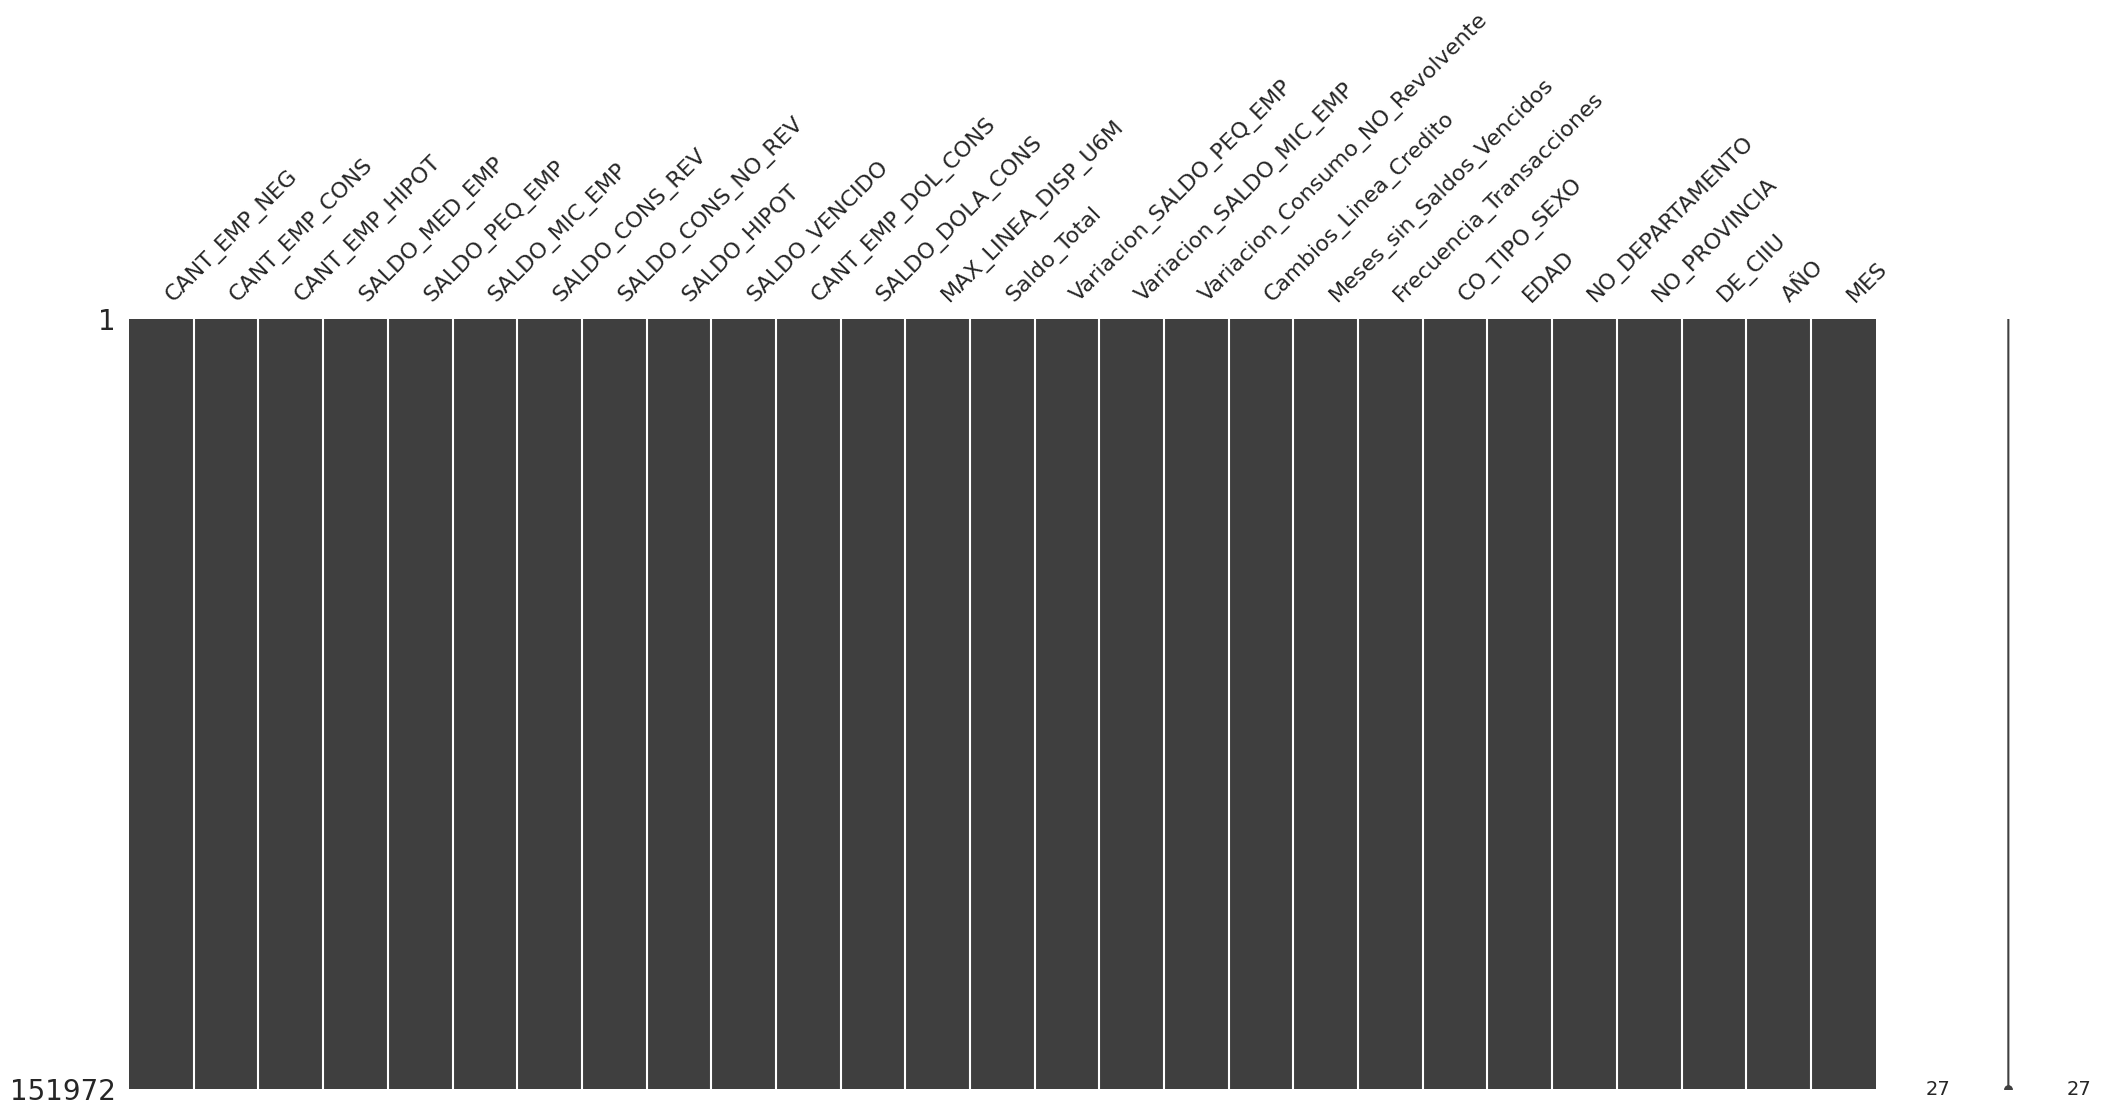

In [85]:
msno.matrix(df_imputado)

In [86]:
df1 = pd.DataFrame({'ID': ID})
df2 = pd.DataFrame({'TARGET': TAR})
data = pd.concat([df1,df_imputado, df2], axis=1)

In [87]:
data

,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,...,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,AÑO,MES,TARGET
0,00000ae64b2d4ea7b318f3caa49fb832,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,...,0.0,0.0,1.0,52.0,3.0,92.0,187.0,2007.0,11.0,NaN
1,00002e673be949b1afe485e71ff71048,1.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,...,0.0,0.0,1.0,61.0,8.0,79.0,255.0,2006.0,1.0,0.0
2,0000e7adc30c476ba07265c60676562c,2.0,2.0,0.0,0.0,38978.653689,0.000,0.000000,27035.078167,0.0,...,9.0,9.0,2.0,49.0,3.0,11.0,245.0,2006.0,11.0,NaN
3,00014b0427554bbbad91e0d8aeab3118,2.0,0.0,0.0,0.0,42683.458622,0.000,0.000000,0.000000,0.0,...,9.0,9.0,1.0,43.0,4.0,75.0,245.0,2006.0,1.0,0.0
4,0001efa922ff405384514b5c6ed18294,1.0,1.0,0.0,0.0,0.000000,0.000,0.000000,4329.417411,0.0,...,9.0,0.0,2.0,56.0,17.0,91.0,187.0,2014.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151967,fffe81ac4d864cf5b21d80e1b39b6bde,1.0,0.0,0.0,0.0,0.000000,13691.889,0.000000,0.000000,0.0,...,9.0,9.0,2.0,61.0,25.0,155.0,235.0,2006.0,1.0,NaN
151968,fffebeece7e3462c9ecd043d93bf8828,3.0,0.0,0.0,0.0,0.000000,12296.196,0.000000,0.000000,0.0,...,9.0,9.0,2.0,50.0,13.0,99.0,191.0,2011.0,5.0,0.0
151969,ffff32ee7ea247bab950cfc94c7ba402,0.0,2.0,0.0,0.0,0.000000,0.000,143.507000,6777.638900,0.0,...,9.0,0.0,1.0,34.0,1.0,84.0,18.0,2018.0,10.0,0.0
151970,ffff49668d014875a2c5af50ac42695a,0.0,2.0,0.0,0.0,0.000000,0.000,1780.832589,11605.451944,0.0,...,9.0,0.0,2.0,45.0,25.0,155.0,187.0,2006.0,5.0,NaN


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151972 entries, 0 to 151971
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               151972 non-null  object 
 1   CANT_EMP_NEG                     151972 non-null  float64
 2   CANT_EMP_CONS                    151972 non-null  float64
 3   CANT_EMP_HIPOT                   151972 non-null  float64
 4   SALDO_MED_EMP                    151972 non-null  float64
 5   SALDO_PEQ_EMP                    151972 non-null  float64
 6   SALDO_MIC_EMP                    151972 non-null  float64
 7   SALDO_CONS_REV                   151972 non-null  float64
 8   SALDO_CONS_NO_REV                151972 non-null  float64
 9   SALDO_HIPOT                      151972 non-null  float64
 10  SALDO_VENCIDO                    151972 non-null  float64
 11  CANT_EMP_DOL_CONS                151972 non-null  float64
 12  SA

In [89]:
# Convertir las columnas cuantitativas discretas a datos entero (int)
data['CANT_EMP_NEG'] = data['CANT_EMP_NEG'].astype(int)
data['CANT_EMP_CONS'] = data['CANT_EMP_CONS'].astype(int)
data['CANT_EMP_HIPOT'] = data['CANT_EMP_HIPOT'].astype(int)                  #### VERIFICAR
#data['CANT_EMP_DOL_NEG'] = data['CANT_EMP_DOL_NEG'].astype(int)
data['CANT_EMP_DOL_CONS'] = data['CANT_EMP_DOL_CONS'].astype(int)
#data['CANT_EMP_DOL_HIPOT'] = data['CANT_EMP_DOL_HIPOT'].astype(int)
data['NO_DEPARTAMENTO'] = data['NO_DEPARTAMENTO'].astype(int)
data['NO_PROVINCIA'] = data['NO_PROVINCIA'].astype(int)
data['DE_CIIU'] = data['DE_CIIU'].astype(int)
data['EDAD'] = data['EDAD'].astype(int)
data['AÑO'] = data['AÑO'].astype(int)
data['CO_TIPO_SEXO'] = data['CO_TIPO_SEXO'].astype(int)
data['MES'] = data['MES'].astype(int)
data['Meses_sin_Saldos_Vencidos'] = data['Meses_sin_Saldos_Vencidos'].astype(int)
data['Frecuencia_Transacciones'] = data['Frecuencia_Transacciones'].astype(int)

## **EXPLORACION DE DATOS**
--------------------------------

In [90]:
df_clase = pd.DataFrame()
df_clase["NO_DEPARTAMENTO"] = data["NO_DEPARTAMENTO"].fillna("NA")
df_clase["TARGET"] = data["TARGET"]

In [91]:
df_clase[['NO_DEPARTAMENTO', 'TARGET']].groupby(['NO_DEPARTAMENTO'], as_index=False).agg(['count','sum','mean'])  #OBSERVAMOS QUE LA PROVINCIA DE ANCASH

TARGET                  
                 count     sum      mean
NO_DEPARTAMENTO                         
0                  709    51.0  0.071932
1                 2892   416.0  0.143845
2                  434    49.0  0.112903
3                 4291   518.0  0.120718
4                 1095    64.0  0.058447
5                 3451   285.0  0.082585
6                 1175   136.0  0.115745
7                  237    18.0  0.075949
8                 1060   130.0  0.122642
9                 1142   142.0  0.124343
10                1693   251.0  0.148258
11                3529   482.0  0.136583
12                2118   200.0  0.094429
13               10244  2801.0  0.273428
14                 488    52.0  0.106557
15                 294    38.0  0.129252
16                 817    92.0  0.112607
17                 254    38.0  0.149606
18                2861   210.0  0.073401
19                1772   142.0  0.080135
20                1199    94.0  0.078399
21                 683    91.0  0.133236
22                 723    68.0  0.094053
23                1909   476.0  0.249345
24                 640    66.0  0.103125
25               45473  6768.0  0.148836

In [92]:
df_clase["EDAD"] = data["EDAD"].fillna("NA")

In [93]:
df_clase[['EDAD', 'TARGET']].groupby(['EDAD'], as_index=False).agg(['count','sum','mean']) #Segun el grafico los NA tienen proporciones similares a los Clientes con EDAD entre 22 y 28 años

TARGET                
      count   sum      mean
EDAD                       
19        4   0.0  0.000000
20        8   0.0  0.000000
21       46   2.0  0.043478
22      131  10.0  0.076336
23      218  18.0  0.082569
...     ...   ...       ...
93        1   1.0  1.000000
94        0   0.0       NaN
95        0   0.0       NaN
96        1   1.0  1.000000
107       1   0.0  0.000000

[77 rows x 3 columns]

In [94]:
data['EDAD'].describe()

count    151972.000000
mean         46.527163
std          11.045730
min          19.000000
25%          39.000000
50%          46.000000
75%          54.000000
max         107.000000
Name: EDAD, dtype: float64

In [95]:
df_clase["DE_CIIU"] = data["DE_CIIU"]


In [96]:
df_clase[['DE_CIIU', 'TARGET']].groupby(['DE_CIIU'], as_index=False).agg(['count','sum','mean'])

TARGET                 
         count    sum      mean
DE_CIIU                        
0           86   13.0  0.151163
1           58    7.0  0.120690
2          384   31.0  0.080729
3           21    9.0  0.428571
4          139   26.0  0.187050
...        ...    ...       ...
251         28    3.0  0.107143
252        876  132.0  0.150685
253        975  140.0  0.143590
254        190   27.0  0.142105
255       1622  278.0  0.171393

[256 rows x 3 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='EDAD'>

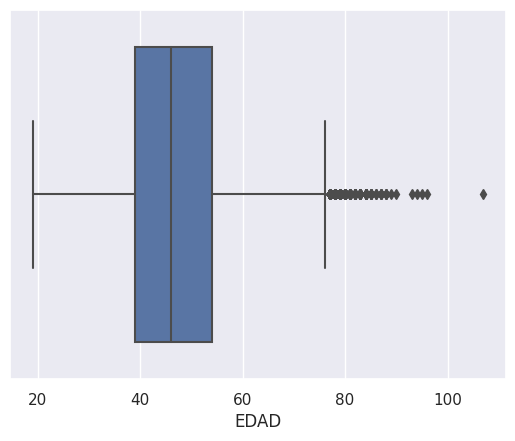

In [97]:
sns.boxplot(x="EDAD", data=data, orient="v")

In [98]:
data.head()

,ID,CANT_EMP_NEG,CANT_EMP_CONS,CANT_EMP_HIPOT,SALDO_MED_EMP,SALDO_PEQ_EMP,SALDO_MIC_EMP,SALDO_CONS_REV,SALDO_CONS_NO_REV,SALDO_HIPOT,...,Meses_sin_Saldos_Vencidos,Frecuencia_Transacciones,CO_TIPO_SEXO,EDAD,NO_DEPARTAMENTO,NO_PROVINCIA,DE_CIIU,AÑO,MES,TARGET
0,00000ae64b2d4ea7b318f3caa49fb832,1,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,1,52,3,92,187,2007,11,NaN
1,00002e673be949b1afe485e71ff71048,1,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,1,61,8,79,255,2006,1,0.0
2,0000e7adc30c476ba07265c60676562c,2,2,0,0.0,38978.653689,0.0,0.0,27035.078167,0.0,...,9,9,2,49,3,11,245,2006,11,NaN
3,00014b0427554bbbad91e0d8aeab3118,2,0,0,0.0,42683.458622,0.0,0.0,0.000000,0.0,...,9,9,1,43,4,75,245,2006,1,0.0
4,0001efa922ff405384514b5c6ed18294,1,1,0,0.0,0.000000,0.0,0.0,4329.417411,0.0,...,9,0,2,56,17,91,187,2014,9,0.0


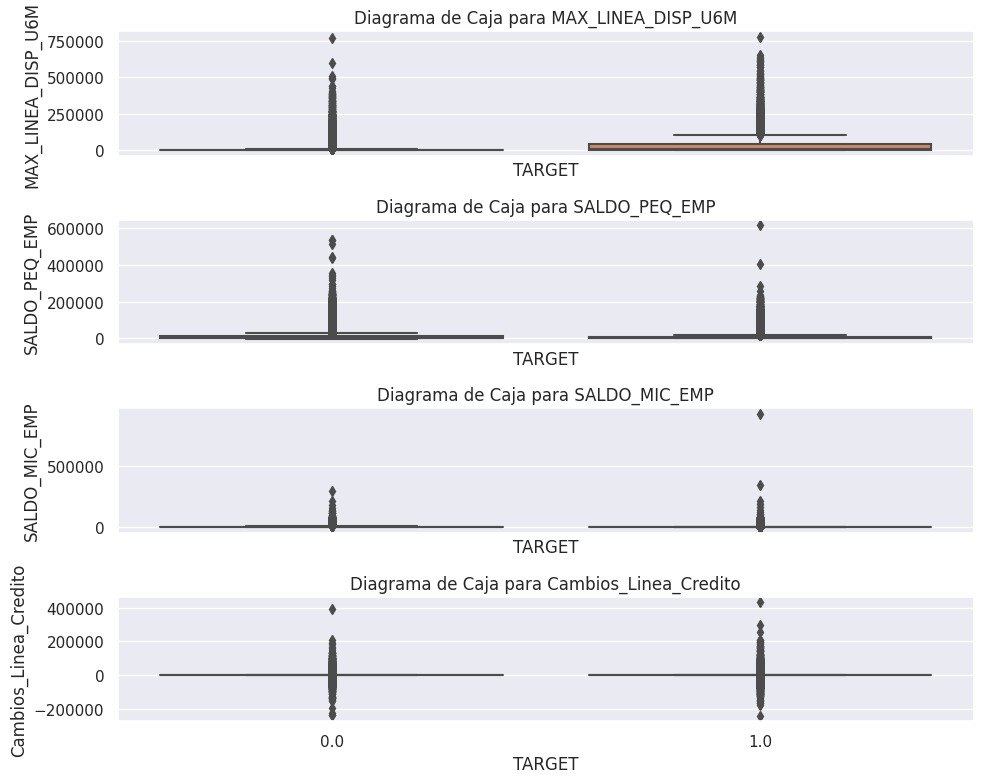

In [99]:
# Selecciona las variables que deseas incluir en los boxplots
variables_interes = ['MAX_LINEA_DISP_U6M', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'Cambios_Linea_Credito']

# Configura el diseño de los subgráficos en una cuadrícula
fig, axes = plt.subplots(nrows=len(variables_interes), figsize=(10, 8), sharex=True)

# Itera sobre las variables y genera los boxplots
for i, var in enumerate(variables_interes):
    sns.boxplot(x='TARGET', y=var, data=data, ax=axes[i])
    axes[i].set_title(f'Diagrama de Caja para {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los boxplots
plt.show()

In [100]:
data['MAX_LINEA_DISP_U6M'].quantile(np.arange(0.9,1,0.01))

0.90     25300.000000
0.91     29321.037228
0.92     34029.572622
0.93     40019.443383
0.94     47402.571333
0.95     57246.149461
0.96     70607.675111
0.97     89108.372687
0.98    119113.809467
0.99    175392.857139
Name: MAX_LINEA_DISP_U6M, dtype: float64

In [101]:
data['MAX_LINEA_DISP_U6M'] = data.where(data['MAX_LINEA_DISP_U6M']<57246.149461, 57246.149461)["MAX_LINEA_DISP_U6M"]

In [102]:
data['SALDO_VENCIDO'].quantile(np.arange(0.9,1,0.01))

0.90      908.394811
0.91     1284.583495
0.92     1741.019111
0.93     2332.887673
0.94     3170.992603
0.95     4407.312947
0.96     6358.594358
0.97     9692.627945
0.98    15792.001703
0.99    30546.412581
Name: SALDO_VENCIDO, dtype: float64

In [103]:
data['SALDO_VENCIDO'] = data.where(data['SALDO_VENCIDO']<4407.312947, 4407.312947)["SALDO_VENCIDO"]

In [104]:
data['SALDO_CONS_REV'].quantile(np.arange(0.9,1,0.01))

0.90     3217.558789
0.91     3672.828038
0.92     4231.955890
0.93     4933.940466
0.94     5800.448674
0.95     6987.234294
0.96     8680.679887
0.97    11156.017701
0.98    15556.376492
0.99    24988.179267
Name: SALDO_CONS_REV, dtype: float64

In [105]:
data['SALDO_CONS_REV'] = data.where(data['SALDO_CONS_REV']<6987.234294, 6987.234294)["SALDO_CONS_REV"]

In [106]:
data['SALDO_MIC_EMP'].quantile(np.arange(0.9,1,0.01))

0.90     9390.555540
0.91    10142.944695
0.92    10914.114204
0.93    11869.642971
0.94    12954.821688
0.95    14226.612525
0.96    15806.872836
0.97    18056.066886
0.98    22347.632304
0.99    30825.077436
Name: SALDO_MIC_EMP, dtype: float64

In [107]:
data['SALDO_MIC_EMP'] = data.where(data['SALDO_MIC_EMP']<14226.612525, 14226.612525)["SALDO_MIC_EMP"]

In [108]:
data['SALDO_PEQ_EMP'].quantile(np.arange(0.9,1,0.01))

0.90     46320.924009
0.91     50429.482075
0.92     55003.153065
0.93     60403.665185
0.94     66521.204929
0.95     73854.445816
0.96     82659.175868
0.97     93294.477481
0.98    107274.100168
0.99    135693.795494
Name: SALDO_PEQ_EMP, dtype: float64

In [109]:
data['SALDO_PEQ_EMP'] = data.where(data['SALDO_PEQ_EMP']<73854.445816, 73854.445816)["SALDO_MIC_EMP"]

In [110]:
data['Cambios_Linea_Credito'].quantile(np.arange(0.9,1,0.01))

0.90     1650.00000
0.91     2200.00000
0.92     3035.02540
0.93     3850.00000
0.94     5213.52238
0.95     6987.53055
0.96     9680.00000
0.97    13310.47850
0.98    20139.13616
0.99    35003.29624
Name: Cambios_Linea_Credito, dtype: float64

In [111]:
data['Cambios_Linea_Credito'] = data.where(data['Cambios_Linea_Credito']<6987.53055, 6987.53055)["Cambios_Linea_Credito"]

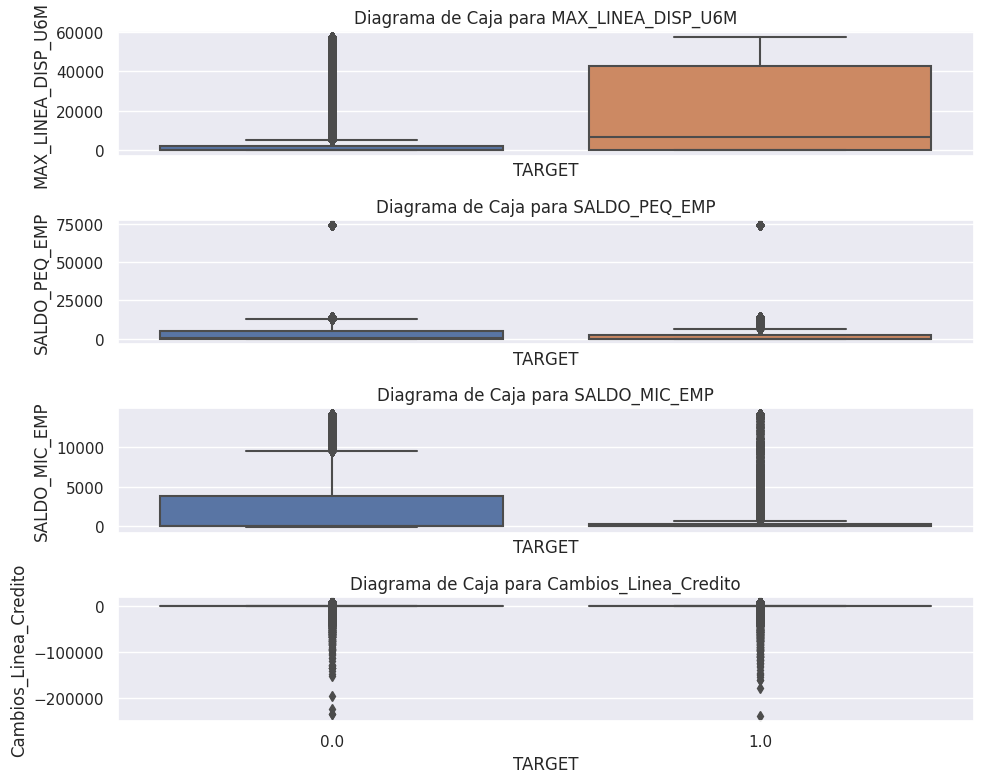

In [112]:
# Selecciona las variables que deseas incluir en los boxplots
variables_interes = ['MAX_LINEA_DISP_U6M', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'Cambios_Linea_Credito']

# Configura el diseño de los subgráficos en una cuadrícula
fig, axes = plt.subplots(nrows=len(variables_interes), figsize=(10, 8), sharex=True)

# Itera sobre las variables y genera los boxplots
for i, var in enumerate(variables_interes):
    sns.boxplot(x='TARGET', y=var, data=data, ax=axes[i])
    axes[i].set_title(f'Diagrama de Caja para {var}')

# Ajusta el espacio entre subgráficos y evita superposiciones
plt.tight_layout()

# Muestra los boxplots
plt.show()

In [113]:
data = data.drop('TARGET', axis=1)
datafinal = pd.merge(df_train, data, on='ID', how='inner')
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91183 entries, 0 to 91182
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               91183 non-null  object 
 1   TARGET                           91183 non-null  int64  
 2   CANT_EMP_NEG                     91183 non-null  int64  
 3   CANT_EMP_CONS                    91183 non-null  int64  
 4   CANT_EMP_HIPOT                   91183 non-null  int64  
 5   SALDO_MED_EMP                    91183 non-null  float64
 6   SALDO_PEQ_EMP                    91183 non-null  float64
 7   SALDO_MIC_EMP                    91183 non-null  float64
 8   SALDO_CONS_REV                   91183 non-null  float64
 9   SALDO_CONS_NO_REV                91183 non-null  float64
 10  SALDO_HIPOT                      91183 non-null  float64
 11  SALDO_VENCIDO                    91183 non-null  float64
 12  CANT_EMP_DOL_CONS 

In [114]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [115]:
def getFeactureIV_Importance(df,feactures,target):
    feactureIV_Importance=list()
    #feacture,target
    for v in feactures:
      iv, rep=calculate_woe_iv(df,v,target)
      feactureIV_Importance.append(iv)
    #pd.DataFrame({"Feacture":feactures,"IV":feactureIV_Importance}).sort_values("IV")
    display(pd.DataFrame({"Feacture":feactures,"IV":feactureIV_Importance}).sort_values("IV"))

In [116]:
datafinal.columns

Index(['ID', 'TARGET', 'CANT_EMP_NEG', 'CANT_EMP_CONS', 'CANT_EMP_HIPOT',
       'SALDO_MED_EMP', 'SALDO_PEQ_EMP', 'SALDO_MIC_EMP', 'SALDO_CONS_REV',
       'SALDO_CONS_NO_REV', 'SALDO_HIPOT', 'SALDO_VENCIDO',
       'CANT_EMP_DOL_CONS', 'SALDO_DOLA_CONS', 'MAX_LINEA_DISP_U6M',
       'Saldo_Total', 'Variacion_SALDO_PEQ_EMP', 'Variacion_SALDO_MIC_EMP',
       'Variacion_Consumo_NO_Revolvente', 'Cambios_Linea_Credito',
       'Meses_sin_Saldos_Vencidos', 'Frecuencia_Transacciones', 'CO_TIPO_SEXO',
       'EDAD', 'NO_DEPARTAMENTO', 'NO_PROVINCIA', 'DE_CIIU', 'AÑO', 'MES'],
      dtype='object')

In [117]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "AÑO", "TARGET")
IV_v

0.20902728153683717

In [118]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "NO_DEPARTAMENTO", "TARGET")
IV_v

0.16421286674814548

In [119]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "NO_PROVINCIA", "TARGET")
IV_v

0.1870356830872996

In [120]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "DE_CIIU", "TARGET")
IV_v

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.2789717255537595

In [121]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "CANT_EMP_NEG", "TARGET")
IV_v

0.4891719962951317

In [122]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "CANT_EMP_CONS", "TARGET")
IV_v

0.1767183176510343

In [123]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "CANT_EMP_HIPOT", "TARGET")
IV_v

0.1019860303033668

In [124]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "CANT_EMP_DOL_CONS", "TARGET")
IV_v

0.3319218608070957

In [125]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "Frecuencia_Transacciones", "TARGET")
IV_v

0.32378544007383114

In [126]:
IV_v, ReporteWoe_v=calculate_woe_iv(datafinal, "Meses_sin_Saldos_Vencidos", "TARGET")
IV_v

0.3457236389559345

In [127]:
#SEGUN EL IV NUESTRAS VARIABLES APORTAN DIRECTAMENTE A LA VARIABLE TARGET

In [128]:
# Crear una copia del conjunto de datos original
# df_respaldo = datafinal.copy()


In [129]:
# datafinal = df_respaldo.copy()

In [130]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91183 entries, 0 to 91182
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               91183 non-null  object 
 1   TARGET                           91183 non-null  int64  
 2   CANT_EMP_NEG                     91183 non-null  int64  
 3   CANT_EMP_CONS                    91183 non-null  int64  
 4   CANT_EMP_HIPOT                   91183 non-null  int64  
 5   SALDO_MED_EMP                    91183 non-null  float64
 6   SALDO_PEQ_EMP                    91183 non-null  float64
 7   SALDO_MIC_EMP                    91183 non-null  float64
 8   SALDO_CONS_REV                   91183 non-null  float64
 9   SALDO_CONS_NO_REV                91183 non-null  float64
 10  SALDO_HIPOT                      91183 non-null  float64
 11  SALDO_VENCIDO                    91183 non-null  float64
 12  CANT_EMP_DOL_CONS 

## **PRUEBA**
---

In [131]:
# Crear una copia del conjunto de datos original
# df_copia = datafinal.copy()
# Lista de variables a eliminar
variables_a_eliminar = [ 'NO_DEPARTAMENTO', 'Cambios_Linea_Credito','SALDO_DOLA_CONS','CANT_EMP_DOL_CONS','SALDO_CONS_NO_REV','CO_TIPO_SEXO']
# Eliminar las variables seleccionadas
datafinal = datafinal.drop(variables_a_eliminar, axis=1)

In [132]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91183 entries, 0 to 91182
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               91183 non-null  object 
 1   TARGET                           91183 non-null  int64  
 2   CANT_EMP_NEG                     91183 non-null  int64  
 3   CANT_EMP_CONS                    91183 non-null  int64  
 4   CANT_EMP_HIPOT                   91183 non-null  int64  
 5   SALDO_MED_EMP                    91183 non-null  float64
 6   SALDO_PEQ_EMP                    91183 non-null  float64
 7   SALDO_MIC_EMP                    91183 non-null  float64
 8   SALDO_CONS_REV                   91183 non-null  float64
 9   SALDO_HIPOT                      91183 non-null  float64
 10  SALDO_VENCIDO                    91183 non-null  float64
 11  MAX_LINEA_DISP_U6M               91183 non-null  float64
 12  Saldo_Total       

## **BALANCEO DE LAS CLASES DE VARIABLE A PREDECIR TARGET**
---

In [133]:
count_class_0, count_class_1 = datafinal.TARGET.value_counts()

# Divide by class
df_class_0 = datafinal[datafinal['TARGET'] == 0]
df_class_1 = datafinal[datafinal['TARGET'] == 1]

In [134]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(77505, 77505, 13678, 13678)

In [135]:
datafinal['TARGET'].value_counts(0)

0    77505
1    13678
Name: TARGET, dtype: int64

Random over-sampling:
0    77505
1    77505
Name: TARGET, dtype: int64


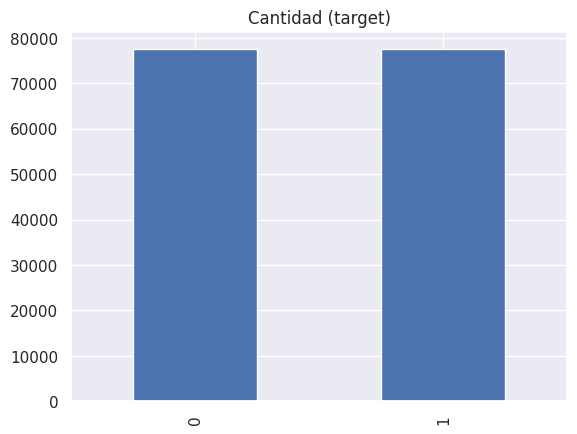

In [136]:
np.random.seed(721)
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.TARGET.value_counts())

df_over.TARGET.value_counts().plot(kind='bar', title='Cantidad (target)');

### **PARA TEST**
---

In [137]:
# Realizar un join basado en la columna 'ID'
data_testf = pd.merge(df_test, data, on='ID', how='inner')


In [138]:
# Lista de variables a eliminar
variables_a_eliminar =  [ 'NO_DEPARTAMENTO', 'Cambios_Linea_Credito','SALDO_DOLA_CONS','CANT_EMP_DOL_CONS','SALDO_CONS_NO_REV','CO_TIPO_SEXO']

# Eliminar las variables seleccionadas
data_testf = data_testf.drop(variables_a_eliminar, axis=1)

In [139]:
data_testf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60789 entries, 0 to 60788
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               60789 non-null  object 
 1   TARGET                           0 non-null      float64
 2   CANT_EMP_NEG                     60789 non-null  int64  
 3   CANT_EMP_CONS                    60789 non-null  int64  
 4   CANT_EMP_HIPOT                   60789 non-null  int64  
 5   SALDO_MED_EMP                    60789 non-null  float64
 6   SALDO_PEQ_EMP                    60789 non-null  float64
 7   SALDO_MIC_EMP                    60789 non-null  float64
 8   SALDO_CONS_REV                   60789 non-null  float64
 9   SALDO_HIPOT                      60789 non-null  float64
 10  SALDO_VENCIDO                    60789 non-null  float64
 11  MAX_LINEA_DISP_U6M               60789 non-null  float64
 12  Saldo_Total       

In [140]:
#probabilities = [0.5, 0.5]  # Probabilidades de obtener 1 o 0

#data_testf['TARGET'] = np.random.choice([1, 0], size=len(data_testf), p=probabilities)

In [141]:
MB = "/content/drive/MyDrive/DATATHON MI BANCO/Y_FINAL.csv"  #SUBIMOS NUESTROS RESULTADOS DEL PRIMER INTENTO DEL KAGGLE PARA TENER UNA NOCION DE LAS CLASFICACIONES POSTERIORES TAMBIEN SE PUEDE PROBAR CON EL CODIGO ANTERIOR
y_testMB = pd.read_csv(MB)

In [142]:
y_testMB = y_testMB['Predictions']

In [143]:
label_upsample_test = data_testf["TARGET"]
IDTEST = data_testf["ID"]
data_testf.drop("TARGET",inplace = True, axis = 1) #Eliminamos la variable Traget para realizar el Train y Test
data_testf.drop("ID",inplace = True, axis = 1)

In [144]:
#PRUEBA VARIABLES MENOS IMPORTANTES
#data_testf.drop("CANT_EMP_DOL_HIPOT",inplace = True, axis = 1)
#data_testf.drop("SALDO_DOLA_NEG",inplace = True, axis = 1)
#data_testf.drop("SALDO_DOLA_HIPOT",inplace = True, axis = 1)
#data_testf.drop("CANT_EMP_DOL_NEG",inplace = True, axis = 1)


In [145]:
X_testMB = data_testf

In [146]:
X_testMB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60789 entries, 0 to 60788
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CANT_EMP_NEG                     60789 non-null  int64  
 1   CANT_EMP_CONS                    60789 non-null  int64  
 2   CANT_EMP_HIPOT                   60789 non-null  int64  
 3   SALDO_MED_EMP                    60789 non-null  float64
 4   SALDO_PEQ_EMP                    60789 non-null  float64
 5   SALDO_MIC_EMP                    60789 non-null  float64
 6   SALDO_CONS_REV                   60789 non-null  float64
 7   SALDO_HIPOT                      60789 non-null  float64
 8   SALDO_VENCIDO                    60789 non-null  float64
 9   MAX_LINEA_DISP_U6M               60789 non-null  float64
 10  Saldo_Total                      60789 non-null  float64
 11  Variacion_SALDO_PEQ_EMP          60789 non-null  float64
 12  Variacion_SALDO_MI

In [147]:
X_testMB.shape

(60789, 21)

In [148]:
y_testMB.shape

(60789,)

**PARA TRAIN**

In [149]:
label_upsample = df_over["TARGET"]
IDTRAIN = df_over["ID"]
df_over.drop("TARGET",inplace = True, axis = 1) #Eliminamos la variable Traget para realizar el Train y Test
df_over.drop("ID",inplace = True, axis = 1)



In [150]:
#PRUEBA VARIABLES MENOS IMPORTANTES
#df_over.drop("CANT_EMP_DOL_HIPOT",inplace = True, axis = 1)
#df_over.drop("SALDO_DOLA_NEG",inplace = True, axis = 1)
#df_over.drop("SALDO_DOLA_HIPOT",inplace = True, axis = 1)
#df_over.drop("CANT_EMP_DOL_NEG",inplace = True, axis = 1)

In [151]:
df_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155010 entries, 1 to 39986
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CANT_EMP_NEG                     155010 non-null  int64  
 1   CANT_EMP_CONS                    155010 non-null  int64  
 2   CANT_EMP_HIPOT                   155010 non-null  int64  
 3   SALDO_MED_EMP                    155010 non-null  float64
 4   SALDO_PEQ_EMP                    155010 non-null  float64
 5   SALDO_MIC_EMP                    155010 non-null  float64
 6   SALDO_CONS_REV                   155010 non-null  float64
 7   SALDO_HIPOT                      155010 non-null  float64
 8   SALDO_VENCIDO                    155010 non-null  float64
 9   MAX_LINEA_DISP_U6M               155010 non-null  float64
 10  Saldo_Total                      155010 non-null  float64
 11  Variacion_SALDO_PEQ_EMP          155010 non-null  float64
 12  Var

In [152]:
# REALIZAMOS LA PARTICION DE LA DATA EN TRAIN Y TEST
from sklearn.model_selection import train_test_split
seed = 721
X_train_o, X_test, y_train_o, y_test = train_test_split(df_over, label_upsample, test_size = 0.3)

In [153]:
X_train_o.shape

(108507, 21)

In [154]:
X_test.shape

(46503, 21)

In [155]:
y_train_o.shape

(108507,)

In [156]:
y_test.shape

(46503,)

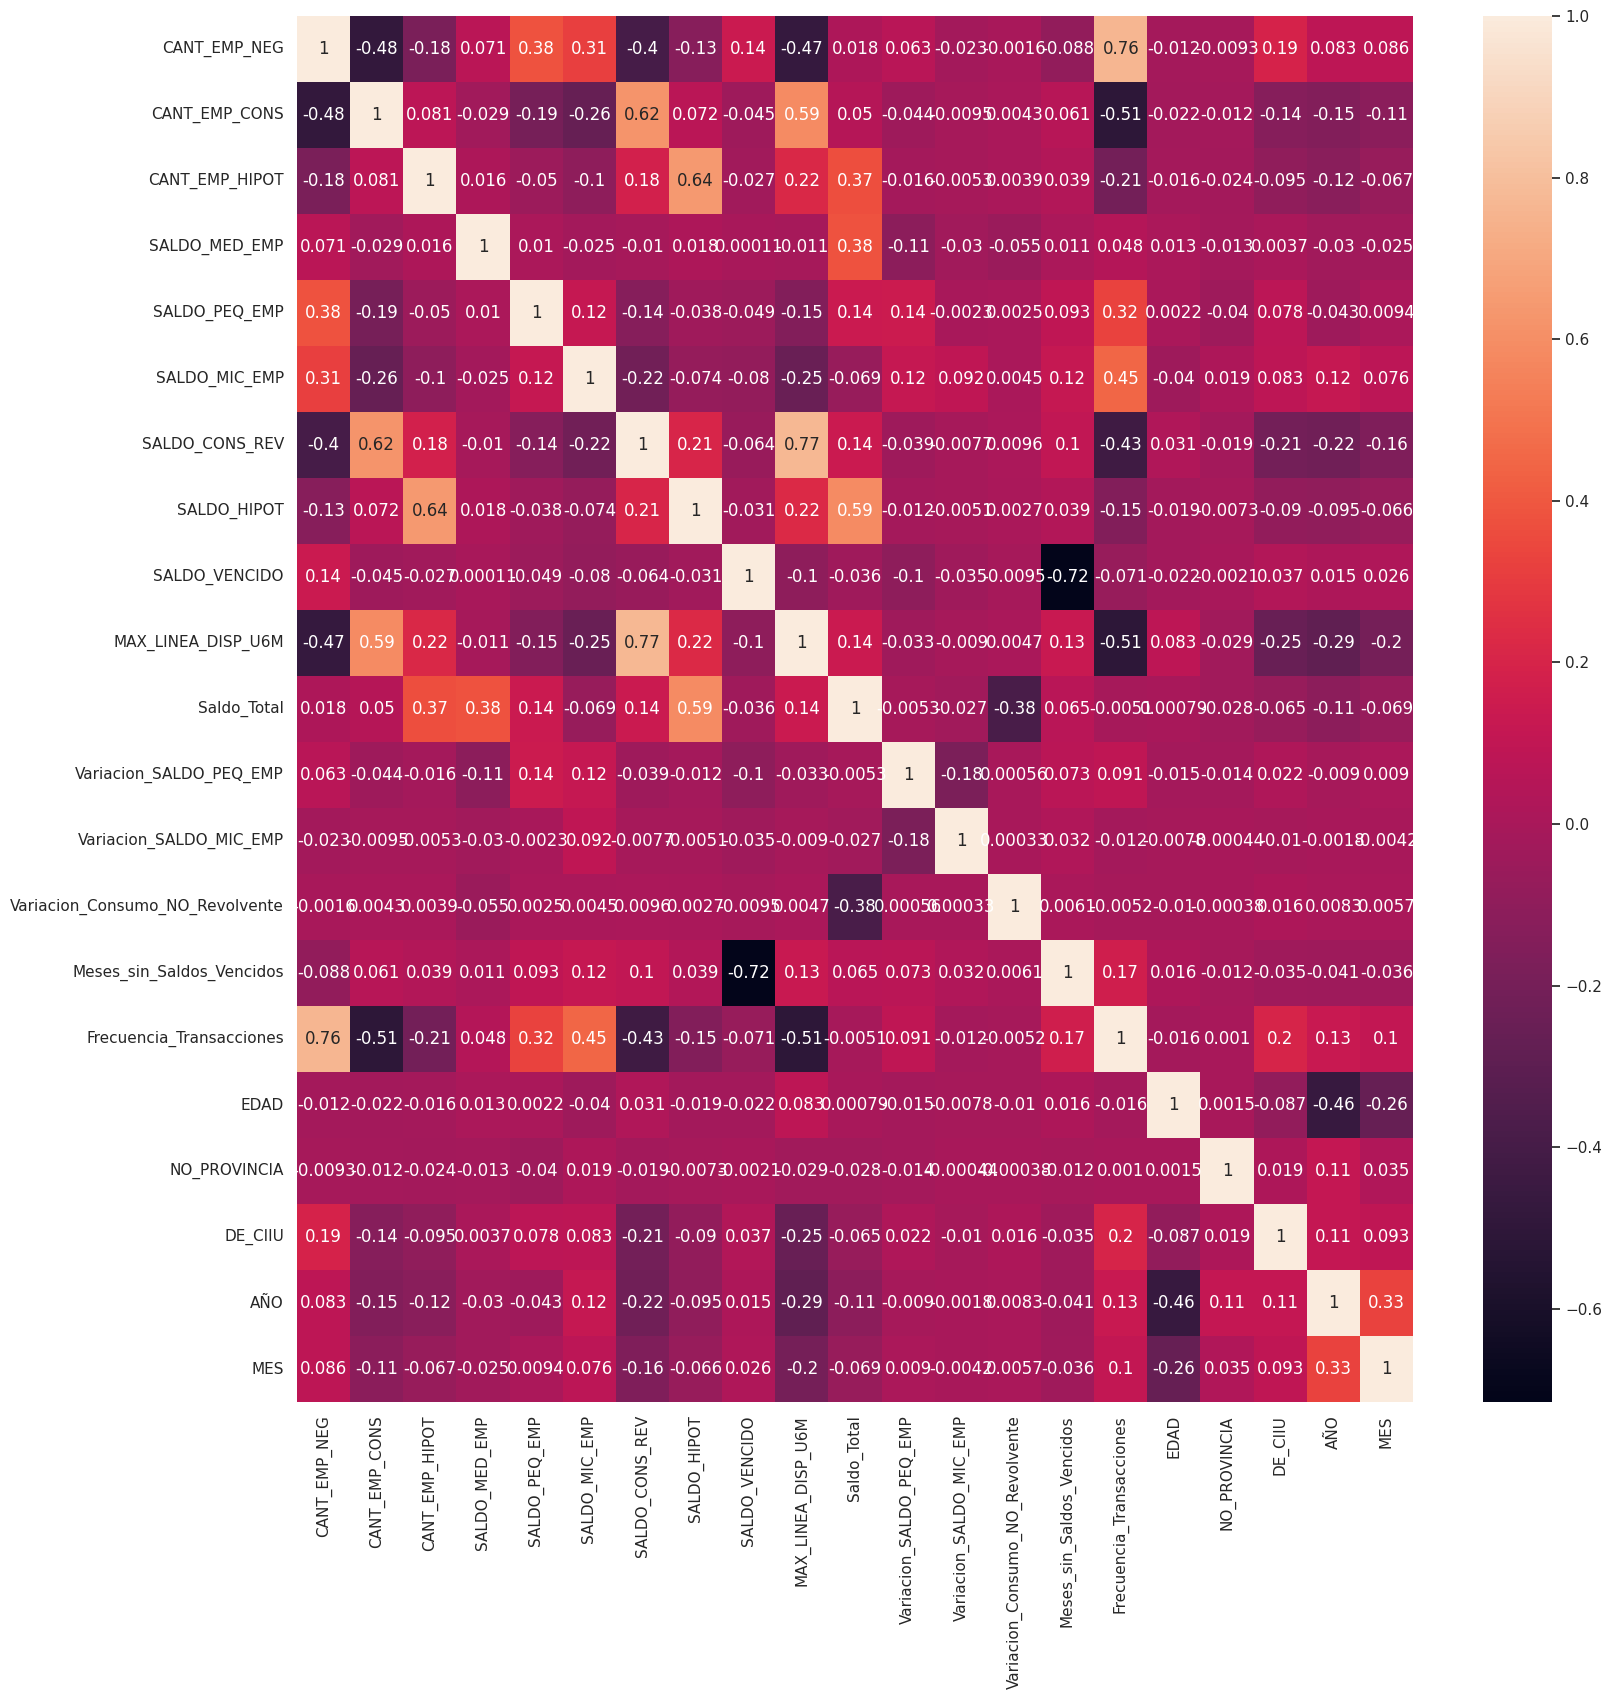

In [157]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_train_o.corr(), annot=True, ax=ax)

plt.show()

# **MODELAMIENTO**
---

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve


In [159]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):

    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha

    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix Test'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['NO AHORRADOR', 'AHORRADOR']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['NO AHORRADOR', 'AHORRADOR']); #distribución de los resultados en la matriz de confusión del eje y

    print(classification_report(yTest,predictions)) #mostrar resultados

    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("AUC ROC : ",roc_auc) #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1]) #código del formato de la gráfica
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('ROC') #título del gráfico
    return predictions


## **IMPORATNCIA DE LAS VARIABLES**
---

                            Feature  Importance
9                MAX_LINEA_DISP_U6M    0.107065
10                      Saldo_Total    0.105916
16                             EDAD    0.081493
18                          DE_CIIU    0.060362
11          Variacion_SALDO_PEQ_EMP    0.058313
19                              AÑO    0.058140
6                    SALDO_CONS_REV    0.056892
13  Variacion_Consumo_NO_Revolvente    0.054787
12          Variacion_SALDO_MIC_EMP    0.053271
20                              MES    0.051214
17                     NO_PROVINCIA    0.049031
0                      CANT_EMP_NEG    0.048834
8                     SALDO_VENCIDO    0.046707
4                     SALDO_PEQ_EMP    0.040373
5                     SALDO_MIC_EMP    0.040014
15         Frecuencia_Transacciones    0.028924
1                     CANT_EMP_CONS    0.024150
14        Meses_sin_Saldos_Vencidos    0.022484
7                       SALDO_HIPOT    0.007204
2                    CANT_EMP_HIPOT    0

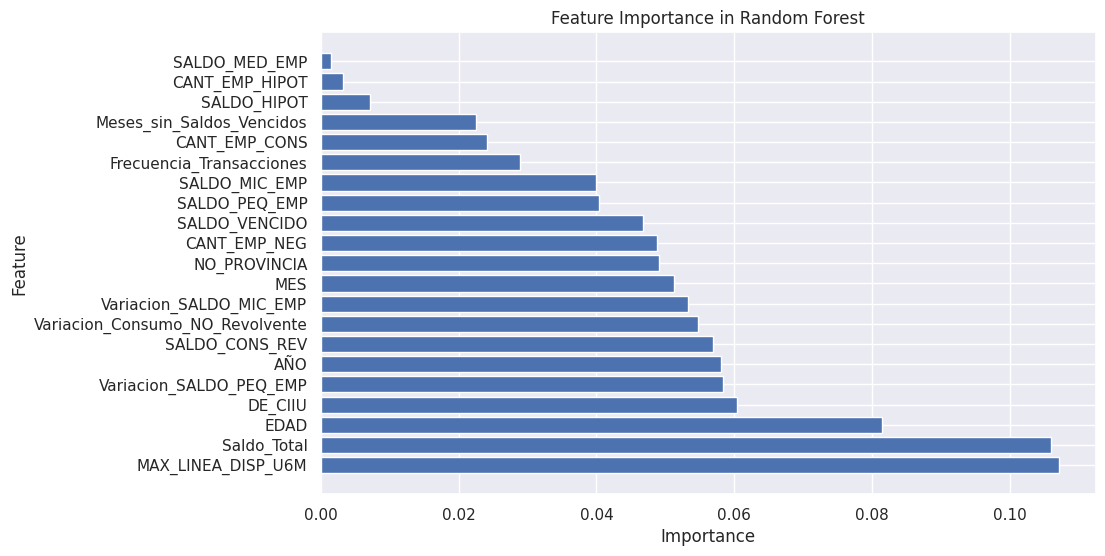

In [160]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que X_train y y_train son tus datos de entrenamiento
# y que ya tienes tus datos preprocesados y divididos.

# Inicializar el clasificador de Random Forest
random_forest = RandomForestClassifier(random_state=721)

# Ajustar el modelo a tus datos
random_forest.fit(X_train_o, y_train_o)

# Obtener la importancia de las características
feature_importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train_o.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame o graficar la importancia de las características
print(feature_importance_df)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

### **RANDOM FOREST ENTRENADO CON LA DATA TRAIN Y PROBADO CON EL TEST DEL TRAIN SIN TUNEO**
---------------------------------------------------

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     23338
           1       0.94      0.99      0.96     23165

    accuracy                           0.96     46503
   macro avg       0.96      0.96      0.96     46503
weighted avg       0.96      0.96      0.96     46503

AUC ROC :  0.963796924251177


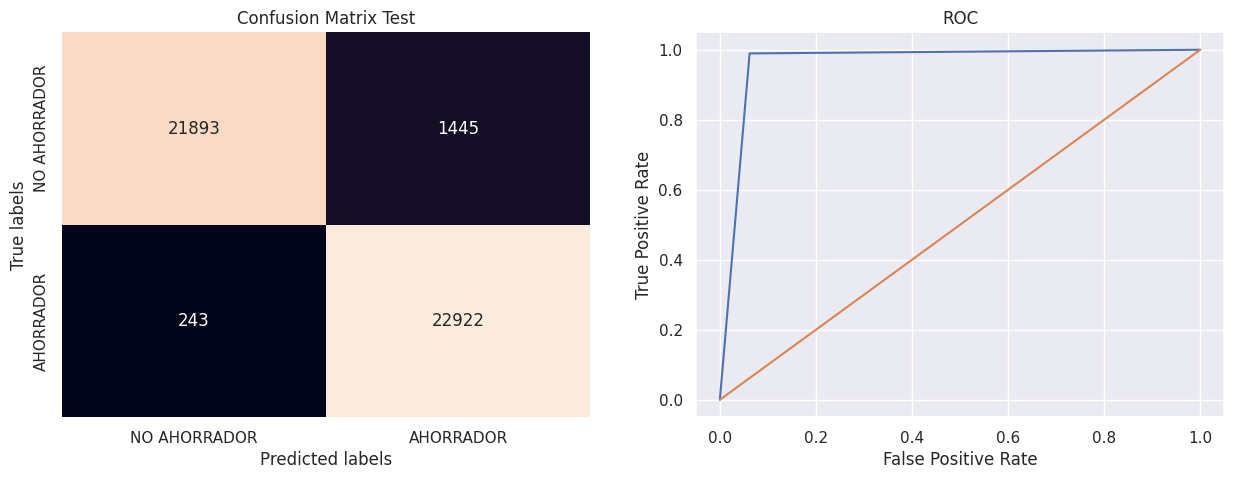

In [161]:
random_forest = RandomForestClassifier(random_state = 721)
apply_classifier(random_forest,X_train_o, X_test, y_train_o, y_test)

## **TUNEO DE HIPERPARAMETROS**
---

In [162]:
seeds = np.arange(1,50,5)
seeds

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])

In [163]:
from time import time
time_star = time()

temp = pd.DataFrame({'atributo':list(X_train_o.columns)})

from sklearn.ensemble import RandomForestClassifier

for seed in seeds:
    clf = RandomForestClassifier(n_estimators=100, random_state = seed)
    clf = clf.fit(X_train_o, y_train_o)
    semilla = 'semilla_' + str(seed)
    temp[semilla] = clf.feature_importances_

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  4.9  minutes


In [164]:
temp['importancia'] = temp.iloc[:,1:].apply(np.mean, axis=1)
temp

,atributo,semilla_1,semilla_6,semilla_11,semilla_16,semilla_21,semilla_26,semilla_31,semilla_36,semilla_41,semilla_46,importancia
0,CANT_EMP_NEG,0.038519,0.050527,0.048635,0.046983,0.048078,0.039750,0.044284,0.045060,0.042619,0.045188,0.044964
1,CANT_EMP_CONS,0.024121,0.022508,0.023992,0.024030,0.024682,0.022843,0.023698,0.023407,0.022760,0.023193,0.023523
2,CANT_EMP_HIPOT,0.003335,0.003045,0.003213,0.003126,0.003091,0.003116,0.003227,0.002673,0.002866,0.002446,0.003014
3,SALDO_MED_EMP,0.001496,0.001550,0.001553,0.001503,0.001653,0.001536,0.001539,0.001560,0.001662,0.001567,0.001562
4,SALDO_PEQ_EMP,0.040137,0.040231,0.039382,0.038988,0.040918,0.040241,0.038046,0.042196,0.041358,0.040439,0.040194
5,SALDO_MIC_EMP,0.039076,0.037594,0.040595,0.040115,0.040663,0.039020,0.039776,0.039885,0.041934,0.039321,0.039798
6,SALDO_CONS_REV,0.062432,0.055865,0.050567,0.057197,0.051123,0.056905,0.056528,0.057058,0.058306,0.058733,0.056471
7,SALDO_HIPOT,0.007003,0.007210,0.007411,0.007706,0.007138,0.007365,0.007221,0.008137,0.007447,0.008291,0.007493
8,SALDO_VENCIDO,0.041016,0.042214,0.038123,0.042975,0.041473,0.042906,0.042941,0.039853,0.046559,0.045594,0.042365
9,MAX_LINEA_DISP_U6M,0.113998,0.116290,0.114075,0.109774,0.110658,0.114406,0.112869,0.113048,0.109243,0.104559,0.111892


In [165]:
ranking_features = temp[['atributo','importancia']].sort_values('importancia', ascending = False).reset_index(drop = True)
ranking_features

,atributo,importancia
0,MAX_LINEA_DISP_U6M,0.111892
1,Saldo_Total,0.106406
2,EDAD,0.081356
3,DE_CIIU,0.060432
4,Variacion_SALDO_PEQ_EMP,0.059195
5,AÑO,0.058134
6,SALDO_CONS_REV,0.056471
7,Variacion_Consumo_NO_Revolvente,0.054769
8,Variacion_SALDO_MIC_EMP,0.052880
9,MES,0.051061


In [199]:
#ranking_features.to_csv('Importancia.csv',index=False)

In [166]:
ranking_features['atributo'].head(13) #ELEGIMOS NUESTRAS 13 VARIABLES MAS IMPORTANTES

0                  MAX_LINEA_DISP_U6M
1                         Saldo_Total
2                                EDAD
3                             DE_CIIU
4             Variacion_SALDO_PEQ_EMP
5                                 AÑO
6                      SALDO_CONS_REV
7     Variacion_Consumo_NO_Revolvente
8             Variacion_SALDO_MIC_EMP
9                                 MES
10                       NO_PROVINCIA
11                       CANT_EMP_NEG
12                      SALDO_VENCIDO
Name: atributo, dtype: object

In [167]:
from time import time
time_star = time()
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import multiprocessing

# Grid de hiperparámetros evaluados, con validacion cruzada

param_grid = {'n_estimators': [150, 300],
              'max_features': [4, 6],
              'max_depth'   : [3, 6],
              'criterion'   : ['gini', 'entropy'],
              'oob_score'   : [True, False]
             }

# Búsqueda por grid search con validación cruzada

grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'roc_auc',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits = 3),#RepeatedKFold(n_splits=5, n_repeats=3, random_state=123),
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_o[ranking_features['atributo'].head(10)], y = y_train_o)

# Resultados

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  37.97  minutes


In [168]:
# Mejores hiperparámetros por validación cruzada
print("Mejores hiperparámetros encontrados (cv)")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
{'criterion': 'gini', 'max_depth': 6, 'max_features': 4, 'n_estimators': 150, 'oob_score': True} : 0.7937943991550233 roc_auc


In [169]:
modelo_final = grid.best_estimator_
modelo_final

RandomForestClassifier(max_depth=6, max_features=4, n_estimators=150,
                       oob_score=True, random_state=123)

In [172]:
# Error de test del modelo final
predicciones = modelo_final.predict(X = X_testMB[ranking_features['atributo'].head(10)])
predicciones[:10]

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [173]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# matriz de confusion
mat_confusion = confusion_matrix(
                    y_true    = np.array(y_testMB),
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_testMB,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")

Matriz de confusión
-------------------
[[43471  9340]
 [ 1434  6544]]

El accuracy de test es: 82.27639869055257 %


In [174]:
print(
    classification_report(
        y_true = y_testMB,
        y_pred = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     52811
           1       0.41      0.82      0.55      7978

    accuracy                           0.82     60789
   macro avg       0.69      0.82      0.72     60789
weighted avg       0.90      0.82      0.84     60789



In [176]:
# Predicción de probabilidades
predicciones = modelo_final.predict_proba(X = X_test[ranking_features['atributo'].head(10)])
predicciones[:10, :]

array([[0.14930561, 0.85069439],
       [0.60628543, 0.39371457],
       [0.41564771, 0.58435229],
       [0.6144079 , 0.3855921 ],
       [0.74794687, 0.25205313],
       [0.74643828, 0.25356172],
       [0.74764983, 0.25235017],
       [0.67657345, 0.32342655],
       [0.63150323, 0.36849677],
       [0.71374669, 0.28625331]])

In [185]:
# Clasificación empleando la clase de mayor probabilidad
#df_predicciones['1'].mean()
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['clasificacion'] = np.where(df_predicciones['1'] > 0.85, 1, 0)
Y = df_predicciones

In [186]:
df_predicciones.clasificacion.value_counts(normalize = True).sort_index()

0    0.884502
1    0.115498
Name: clasificacion, dtype: float64

In [188]:
from sklearn.inspection import permutation_importance

importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train_o[ranking_features['atributo'].head(10)],
                y            = y_train_o,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train_o[ranking_features['atributo'].head(10)].columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
0,0.145634,0.000697,MAX_LINEA_DISP_U6M
1,0.031105,0.000681,Saldo_Total
4,0.025962,0.000625,Variacion_SALDO_PEQ_EMP
8,0.021308,0.000417,Variacion_SALDO_MIC_EMP
6,0.010388,0.000195,SALDO_CONS_REV
7,0.003300,0.000193,Variacion_Consumo_NO_Revolvente
5,0.003226,0.000255,AÑO
2,0.003100,0.000219,EDAD
3,0.002774,0.000095,DE_CIIU
9,0.000819,0.000139,MES


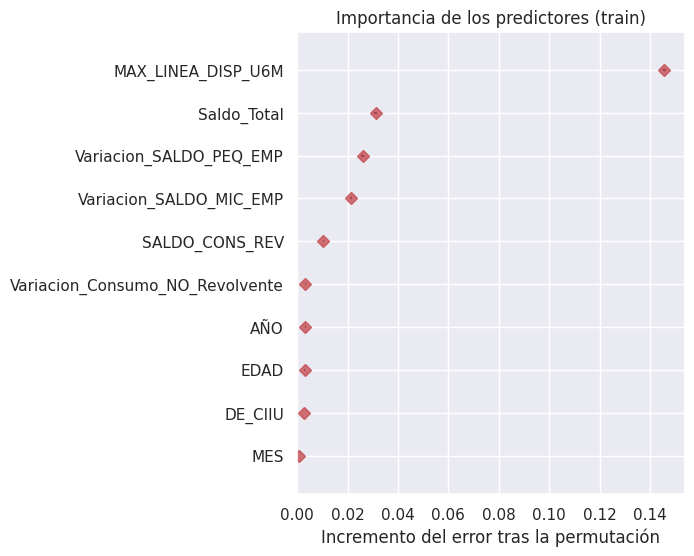

In [189]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

In [190]:
print(modelo_final.oob_score_)

0.7245615490244869


              precision    recall  f1-score   support

           0       0.98      0.81      0.89     52811
           1       0.42      0.89      0.57      7978

    accuracy                           0.82     60789
   macro avg       0.70      0.85      0.73     60789
weighted avg       0.91      0.82      0.85     60789

AUC ROC :  0.8530571011923737


array([1, 0, 1, ..., 0, 0, 0])

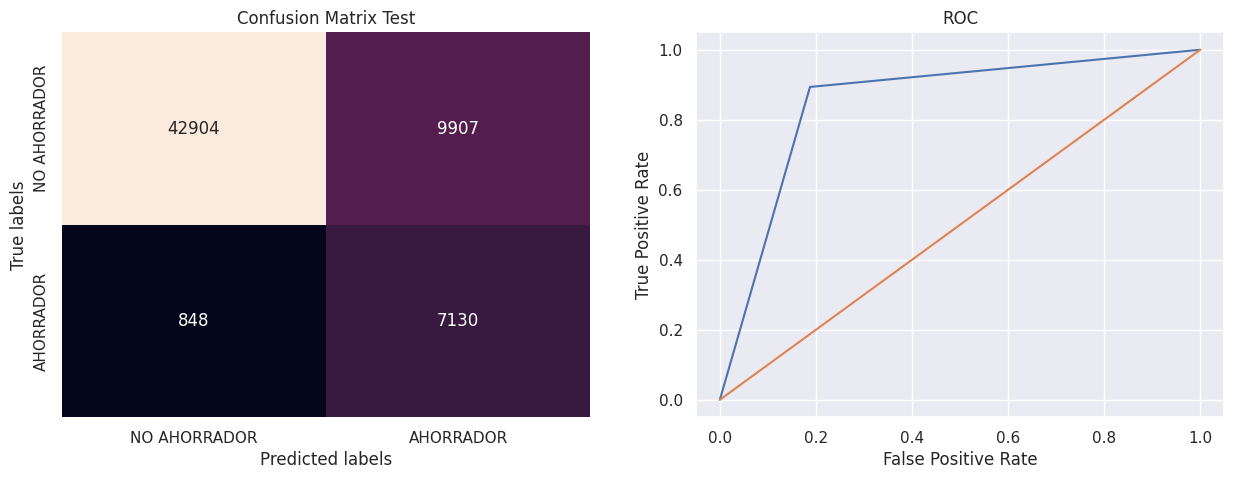

In [191]:

apply_classifier(modelo_final,X_train_o, X_testMB, y_train_o, y_testMB)

## **RANDOM FOREST ENTRENADO CON LA DATA TRAIN Y PROBADO EN EL TEST KAGGLE**
---------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     52811
           1       0.74      0.76      0.75      7978

    accuracy                           0.93     60789
   macro avg       0.85      0.86      0.86     60789
weighted avg       0.93      0.93      0.93     60789

AUC ROC :  0.8600055529901374


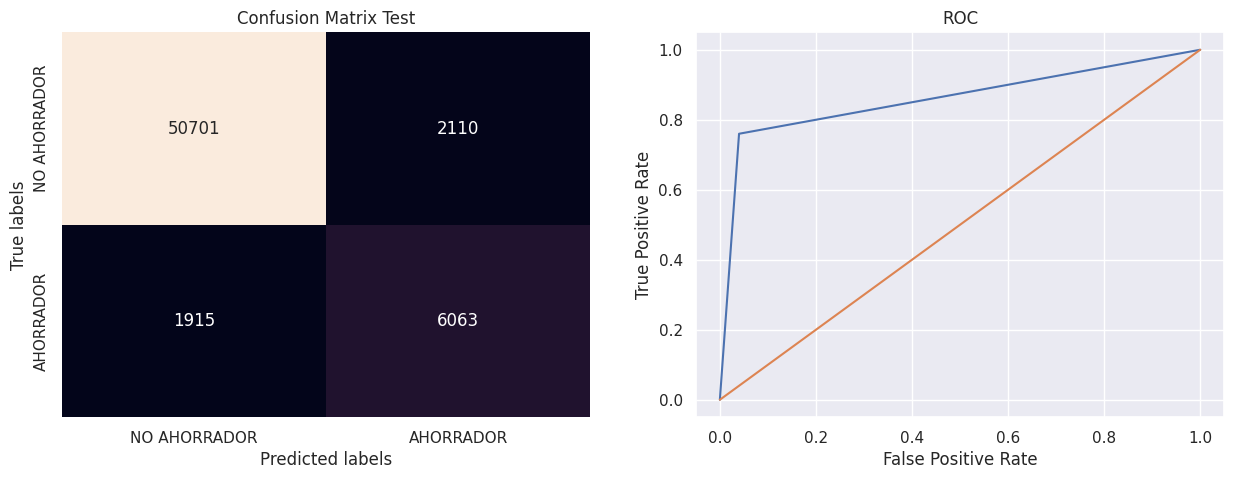

In [189]:
random_forest = RandomForestClassifier(random_state = 721,
    n_estimators=300,
    max_depth = 25,
    criterion = "entropy",
    min_samples_split=5,
    class_weight ="balanced")
Y = apply_classifier(random_forest,X_train_o, X_testMB, y_train_o, y_testMB)

## **XGBOOST ENTRENADO CON LA DATA TRAIN Y PROBADO CON EL TEST DEL TRAIN**
---------------------------------------------------

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     23161
           1       0.91      0.96      0.94     23342

    accuracy                           0.94     46503
   macro avg       0.94      0.94      0.94     46503
weighted avg       0.94      0.94      0.94     46503

AUC ROC :  0.9354314662376236


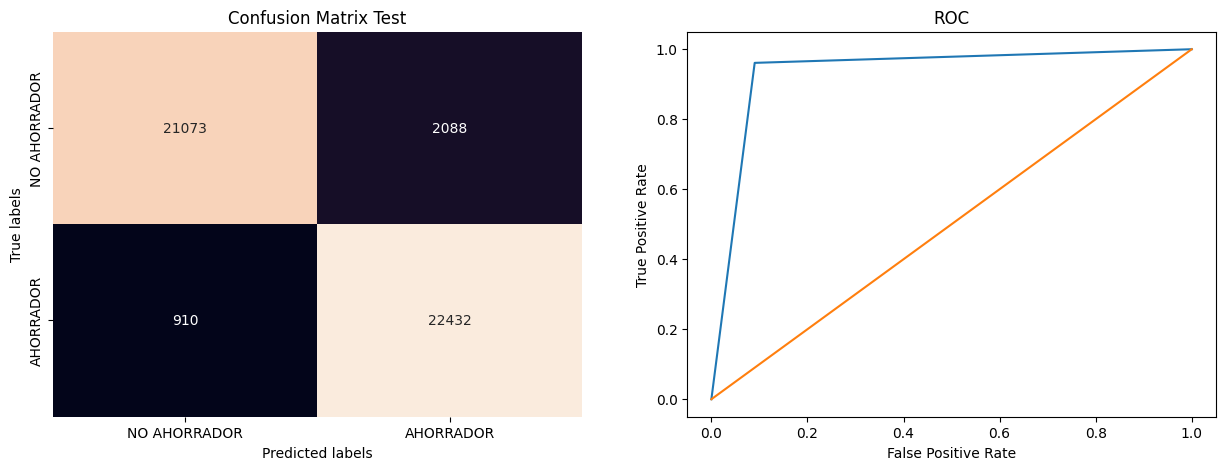

In [ ]:
xg_boost = XGBClassifier(
    random_state=721,
    learning_rate=0.05,
    n_estimators=200,
    max_depth=7,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    gamma=0,
)
apply_classifier(xg_boost,X_train_o, X_test, y_train_o, y_test)

## **XGBOOST ENTRENADO CON LA DATA TRAIN Y PROBADO EN EL TEST KAGGLE**
---------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.94      0.93     52811
           1       0.56      0.54      0.55      7978

    accuracy                           0.88     60789
   macro avg       0.75      0.74      0.74     60789
weighted avg       0.88      0.88      0.88     60789

AUC ROC :  0.7392900917393312


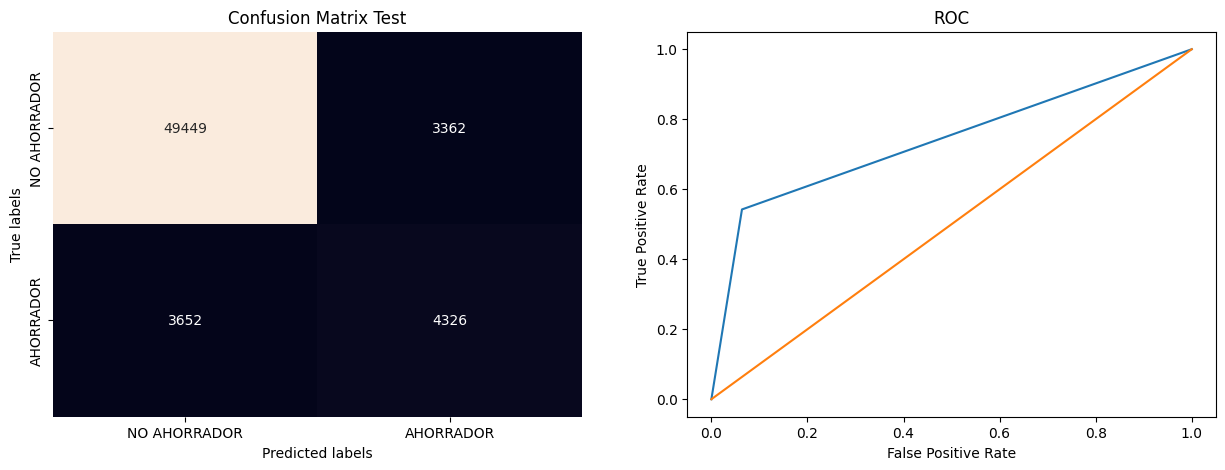

In [ ]:
xg_boost = XGBClassifier(
    random_state=721,
    learning_rate=0.05,
    n_estimators=200,
    max_depth=7,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    gamma=0,
)
Y = apply_classifier(xg_boost,X_train_o, X_testMB, y_train_o, y_testMB)

### **SALIDA DEL CLASIFICADOR**
---

In [ ]:
Y  # EL Y TOMARA LOS VALORES DEL ULTIMO MODELO CORRIDO

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Suponiendo que tu array de predicciones se llama predictions
df_predictions = pd.DataFrame(Y, columns=['Predictions'])

In [ ]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60789 entries, 0 to 60788
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Predictions  60789 non-null  int64
dtypes: int64(1)
memory usage: 475.0 KB


In [ ]:
df_predictions.value_counts()

Predictions
0              53140
1               7649
dtype: int64

In [ ]:
# Suponiendo que tu array de predicciones se llama predictions
MID = pd.DataFrame(IDTEST, columns=['ID'])

In [ ]:
MID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60789 entries, 0 to 60788
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      60789 non-null  object
dtypes: object(1)
memory usage: 949.8+ KB


In [ ]:
RESULTADO = pd.concat([MID, df_predictions], axis=1)

In [ ]:
RESULTADO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60789 entries, 0 to 60788
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           60789 non-null  object
 1   Predictions  60789 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
RESULTADO.to_csv('PREDICCIONES.csv', index=False) # PREDICCION SACADA DEL RANDOM FOREST PROBADO EN EL TEST KAGGLE